### Предсказание цены жилого дома в городе Воронеже и его пригородных поселках.

1. [Общая информация о проекте](#общая-информация-о-проекте)
2. [Загрузка библиотек](#загрузка-библиотек)
3. [Загрузка и проверка набора данных](#загрузка-и-проверка-набора-данных)
4. [Исследовательский анализ данных / EDA](#исследовательский-анализ-данных-eda) <br>
    4.1 [Анализ зависимости цены жилого дома от его месторасположения](#анализ-зависимости-цены-жилого-дома-от-его-месторасположения) <br>
    4.2 [Интуитивный анализ распределения числовых признаков, выявление закономерностей и аномалий в них на основе описательной статистики набора данных](#интуитивный-анализ-распределения-числовых-признаков-выявление-закономерностей-и-аномалий-в-них-на-основе-описательной-статистики-набора-данных) <br>
5. [Feature Engineering](#feature-engineering)
6. [Заполнение пропусков](#заполнение-пропусков)
7. [Анализ целевой переменной](#анализ-целевой-переменной) <br>
    7.1 [Диагностика целевой переменной на основе гистограммы распределения,  Box plot и QQ Plot](#диагностика-целевой-переменной-на-основе-гистограммы-распределения-box-plot-и-qq-plot) <br>
    7.2 [Нормализация целевой переменной при помощи логарифмического преобразования](#нормализация-целевой-переменной-при-помощи-логарифмического-преобразования) <br>
8. [Определение числовых признаков, в распределении которых наблюдается сильное асимметрия/искривление и применение функции  логарифмического преобразования к ним](#определение-числовых-признаков-в-распределении-которых-наблюдается-сильное-асимметрия-искривление-и-применение-функции-логарифмического-преобразования-к-ним) <br>
9. [Анализ ранговых переменных](#анализ-ранговых-переменных) <br>
    9.1 [Идентификация признаков, представляющих собой ранговые переменные](#идентификация-признаков-представляющих-собой-ранговые-переменные) <br>
    9.2 [Кодирование ранговых переменных в числовые значения](#кодирование-ранговых-переменных-в-числовые-значения) <br>
10. [Идентификация признаков с доминирующей категорией и очистка набора данных от них](#идентификация-признаков-с-доминирующей-категорией-и-очистка-набора-данных-от-них) 
11. [Кодирование оставшихся категориальных признаков](#кодирование-оставшихся-категориальных-признаков)
12. [Оптимизация набора данных исходя из коэффициента корреляции признаков с целевой переменной](#оптимизация-набора-данных-исходя-из-коэффициента-корреляции-признаков-с-целевой-переменной) <br>
    12.1 [Создание стилизованной таблицы корреляции признаков с целевой переменной](#создание-стилизованной-таблицы-корреляции-признаков-с-целевой-переменной) <br>
    12.2 [Отбор признаков на основании порогового значения коэффициента корреляции](#отбор-признаков-на-основании-порогового-значения-коэффициента-корреляции) <br>    
13. [Устранение мультиколлинеарности в наборе данных](#устранение-мультиколлинеарности-в-наборе-данных) <br>
    13.1 [Идентификация мультиколлинеарных признаков](#идентификация-мультиколлинеарных-признаков) <br>
    13.2 [Создание списка к удалению](#создание-списка-к-удалению) <br>
    13.3 [Оценка важности признаков](#оценка-важности-признаков) <br>
14. [Подготовка данных для дальнейшего моделирования](#подготовка-данных-для-дальнейшего-моделирования) <br>
    14.1 [Подготовка обучающей выборки и валидационной](#подготовка-обучающей-выборки-и-валидационной) <br>
    14.2 [Предобработка данных для линейных моделей](#предобработка-данных-для-линейных-моделей) <br>
    14.3 [Предобработка данных для LightGBM и Random Forest](#предобработка-данных-для-lightgbm-и-random-forest) <br>
    14.4 [Предобработка данных для CatBoost](#предобработка-данных-для-catboost) <br>
15. [Инициализация моделей для первичного сравнения производительности](#инициализация-моделей-для-первичного-сравнения-производительности)
16. [Baseline - моделирование и анализ производительности](#baseline-моделирование-и-анализ-производительности)
17. [Подбор гиперпараметров для ансамблевых моделей](#подбор-гиперпараметров-для-ансамблевых-моделей)
18. [Финальное моделирование](#финальное-моделирование) <br>
    18.1 [Формирование рейтинговой таблицы и определение лидера по качеству и стабильности в предсказаниях](#формирование-рейтинговой-таблицы-и-определение-лидера-по-качеству-и-стабильности-в-предсказаниях) <br>
    18.2 [Анализ результативности моделей](#анализ-результативности-моделей) <br>
    18.3 [Оценка важности признаков CatBoost](#оценка-важности-признаков-catboost) <br>

#### 1. Общая информация о проекте <a id='общая-информация-о-проекте'></a>

Этот проект использует адаптированную версию Ames Housing Dataset с Kaggle.

Для повышения релевантности и наглядности:
1. Все признаки адаптированы под российский рынок недвижимости
2. Локации изменены с Эймса (США) на Воронеж (Россия)
3. Цены конвертированы в рубли по среднегодовому курсу доллара, соответствующему году продажи
4. Единицы измерения приведены к метрической системе

Цель адаптации — демонстрация полного цикла анализа данных в знакомом для российской аудитории контексте.

Воронеж - город-миллионик, административный центр Воронежской области. Это крупный промышленный, научный и образовательный центр, исторический город с развитой инфраструктурой и динамичным рынком недвижимости. Известен как "колыбель русского флота" и центр черноземного региона. <br>
Набор данных содержит признак с целевой переменной - ценой продажи и 64 признаками, которые детально описывают характеристики жилых объектов. <br>
Основные категории признаков:
 1. Локационные характеристики:
    - Район города / наименование пригородного поселка 
    - Принадлежность к городской/пригородной зоне
 2. Параметры объекта недвижимости:
    - Тип жилья (частный дом, квартира, таунхаус)
    - Общая площадь, жилая площадь, площадь участка
    - Количество комнат, спален, ванных комнат
    - Год постройки, год последнего ремонта
 3. Качественные характеристики:
    - Состояние объекта (от "требует ремонта" до "элитное")
    - Качество строительных материалов
    - Наличие и состояние коммуникаций
 4. Инфраструктурные особенности:
    - Наличие гаража, подвала, мансарды
    - Тип подъездных путей
    - Наличие бассейна, камина и других дополнительных элементов 
    
Цель проекта:
 - Выявление ключевых факторов, влияющих на стоимость жилья
 - Построение модели машинного обучения для точного прогнозирования цен на жильё
 - Сравнение эффективности различных алгоритмов (LightGBM, CatBoost, Random Forest, Линейные модели)
 - Оценка эффективности полученной модели

Список признаков набора данных:

<b> SalePrice: </b> цена продажи недвижимости в рублях. Это целевая переменная, которую пытаемся предсказать <br>
<b> Id: </b> Идентификатор объекта <br>
<b> MSSubClass: </b> Класс здания <br>
<b> LotFrontage: </b> фронтальная граница участка <br>
<b> LotArea: </b> Размер участка в квадратных метрах <br>
<b> Street: </b> Тип подъездной дороги <br>
<b> LotShape: </b> Общая форма собственности <br>
<b> LandContour: </b> Степень выровненности участка <br>
<b> Utilities: </b> Доступность коммунальных услуг на участке <br>
<b> LotConfig: </b> Расположение участка относительно улиц и соседних участков <br>
<b> LandSlope: </b> Уклон земельного участка <br>
<b> Condition1: </b> Близость к различным объектам инфраструктуры, которые влияют на комфорт проживания <br>
<b> BldgType: </b> Тип жилого помещения <br>
<b> HouseStyle: </b> Архитектурный стиль/тип дома по этажности <br>
<b> OverallQual: </b> Общее качество материала и отделки <br>
<b> OverallCond: </b> Оценка общего состояния <br>
<b> YearBuilt: </b> Первоначальная дата постройки <br>
<b> YearRemodAdd: </b> Дата реконструкции <br>
<b> RoofMatl: </b> Кровельный материал <br>
<b> Exterior1st: </b> Основной материал наружной отделки/обшивки дома <br>
<b> Exterior2nd: </b> Дополнительный материал наружной отделки/обшивки дома (если используется более одного материала) <br>
<b> MasVnrType: </b> Тип каменной/кирпичной облицовки, если она есть <br> 
<b> MasVnrArea: </b> Площадь облицовки каменной кладки в квадратных метрах <br>
<b> ExterQual: </b> Качество наружного материала <br>
<b> ExterCond: </b> Текущее физическое состояние наружных материалов, а не их исходное качество. Это оценка износа, повреждений,  необходимости ремонта <br>
<b> Foundation: </b> Тип фундамента <br>
<b> BsmtQual: </b> Высота подвала <br>
<b> BsmtCond: </b> Общее состояние подвала <br>
<b> BsmtExposure: </b> Степень естественной освещенности подвала <br>
<b> BsmtFinType1: </b> Качество отделки подвала <br>
<b> BsmtUnfSF: </b> Незаконченные квадратные футы подвальной площади <br>
<b> TotalBsmtSF: </b> Общая площадь подвала в квадратных метрах <br>
<b> Heating: </b> Тип отопления <br>
<b> HeatingQC: </b> Качество и состояние отопления <br>
<b> CentralAir: </b> Центральное кондиционирование воздуха <br>
<b> Electrical: </b> Тип электрической системы/проводки в доме <br>
<b> 1stFlrSF: </b> Площадь первого этажа в квадратных метрах <br>
<b> 2ndFlrSF: </b> Площадь второго этажа в квадратных метрах <br>
<b> LowQualFinSF: </b> Площадь помещений с низкокачественной отделкой на всех этажах <br>
<b> GrLivArea: </b> Жилая площадь в квадратных метрах <br>
<b> FullBath: </b> Ванная комната со всеми удобствами (унитаз, раковина, душ/ванна) <br>
<b> HalfBath: </b> Гостевой санузел (туалет + раковина) <br>
<b> BedroomAbvGr: </b> Количество спален <br>
<b> KitchenAbvGr: </b> Количество кухонь <br>
<b> KitchenQual: </b> Качество кухни <br>
<b> TotRmsAbvGrd: </b> Общее количество всех помещений (не включает ванные комнаты) <br>
<b> Functional: </b> Рейтинг функциональности дома <br>
<b> Fireplaces: </b> Количество каминов <br>
<b> FireplaceQu: </b> Качество камина <br>
<b> GarageType: </b> Тип/расположение гаража <br>
<b> GarageFinish: </b> Внутренняя отделка гаража <br>
<b> GarageCars: </b> Размер гаража в зависимости от вместимости автомобиля <br>
<b> GarageArea: </b> Размер гаража в квадратных футах <br>
<b> GarageQual: </b> Качество гаража <br>
<b> GarageCond: </b> Состояние гаража <br>
<b> PavedDrive: </b> Тип покрытия подъездной дорожки к участку/гаражу <br>
<b> OpenPorchSF: </b> Площадь открытой веранды в квадратных метрах <br>
<b> EnclosedPorch: </b> Площадь закрытой веранды в квадратных метрах <br>
<b> PoolArea: </b> Площадь бассейна в квадратных метрах <br>
<b> PoolQC: </b> Качество бассейна <br>
<b> Fence: </b> Тип забора <br>
<b> MoSold: </b> Месяц продажи <br>
<b> YrSold: </b> Год продажи <br>
<b> SaleType: </b> Тип продажи <br>

#### 2. Загрузка библиотек <a id='загрузка-библиотек'></a>

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import catboost as cb

import scipy.stats as st 
from scipy.stats import shapiro

In [4]:
# Устанавливаем комфортный вывод числовых значений.
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

#### 3. Загрузка и проверка набора данных <a id='загрузка-и-проверка-набора-данных'></a>

In [5]:
train = pd.read_csv('train_russian.csv')

In [6]:
train.shape

(1460, 65)

В наборе данных 1460 объектов и 65 признаков.

In [7]:
train.duplicated().sum()

0

Дубликаты строк отсутствуют.

In [8]:
# Посмотрим на распределение признаков по типу данных.
train.dtypes.value_counts()

object     37
int64      14
float64    14
Name: count, dtype: int64

В наборе данных 37 категориальных колонок и 28 числовых.

#### 4. Исследовательский анализ данных / EDA <a id='исследовательский-анализ-данных-eda'></a>

##### 4.1 Анализ зависимости цены жилого дома от его месторасположения <a id='анализ-зависимости-цены-жилого-дома-от-его-месторасположения'></a>

Проанализируем зависимость цены продажи от месторасположения объекта. Посмотрим на распределение числа домов, их средней цены в различных районах города и пригородных поселках. 

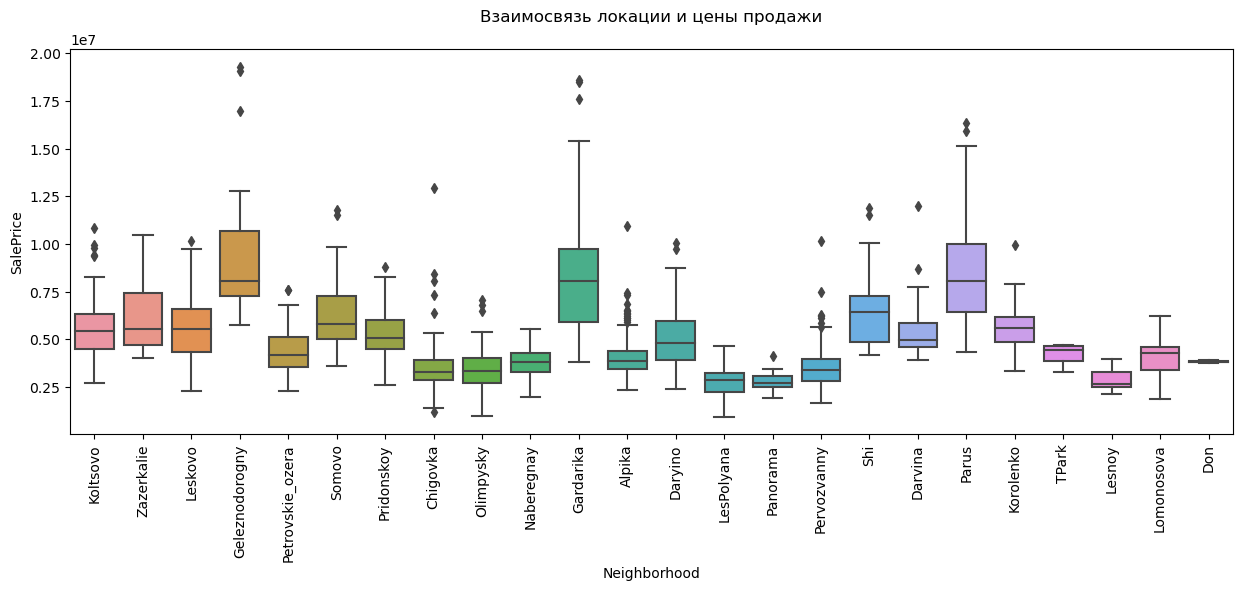

In [9]:
# Построим boxplot для каждого района.
plt.figure(figsize = (15, 5))
sns.boxplot(x = train.Neighborhood, y = train.SalePrice)
plt.title('Взаимосвязь локации и цены продажи', y = 1.05)
plt.xticks(rotation = 90)
plt.show()

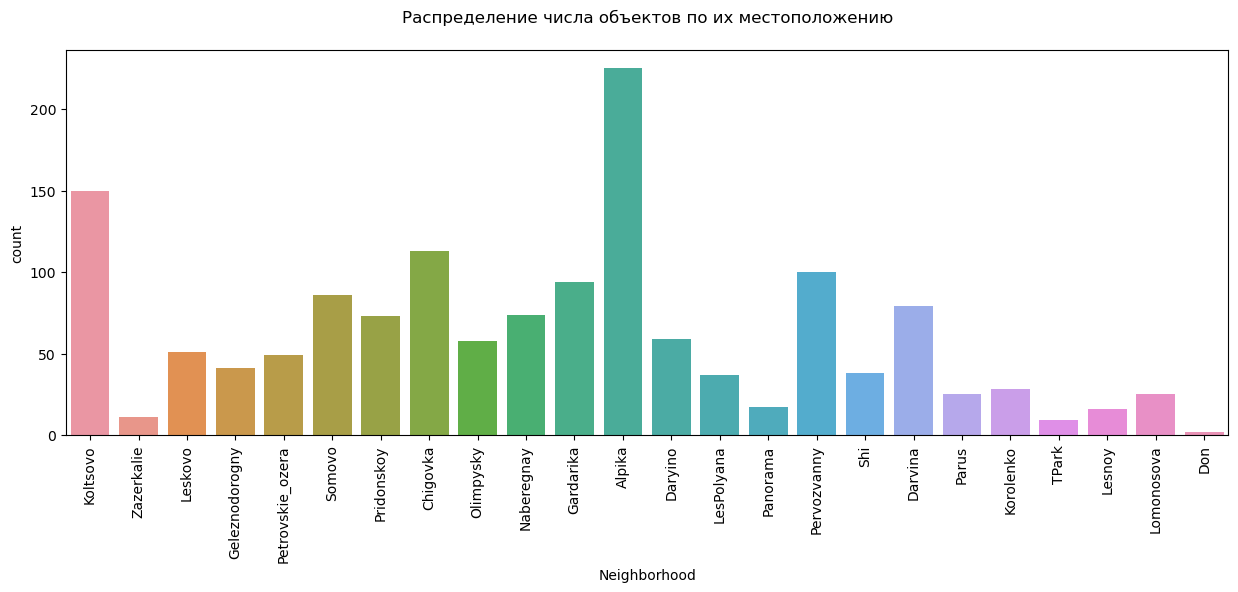

In [10]:
# Посмотрим на распределение признака "район" (Neighborhood).
plt.figure(figsize = (15, 5))
sns.countplot(x = train.Neighborhood)
plt.title('Распределение числа объектов по их местоположению', y = 1.05)
plt.xticks(rotation = 90)
plt.show()

Мы видим, что средняя цена продажи значительно варьируется в разных районах  и пригородных поселках. Например, дома в поселках Gardarika и Parus, как правило, имеют более высокую среднюю цену продажи и разброс цены по сравнению с домами в др. территориальных зонах.

В поселке Don разброс цены незначительный потому, что на продажу выставлено наименьшее число домов.

Лидеры продаж - Koltsovo и Alpika. Средняя цена в этих поселках невысока. Вполне имеет место быть, что число предложений играет в сторону понижения средней цены объекта.

В Alpika средняя цена ниже, чем в Koltsovo, но есть множество домов, у которых цена сильно отличается в большую сторону от домов в этом же районе.

##### 4.2 Интуитивный анализ распределения числовых признаков, выявление закономерностей и аномалий в них на основе описательной статистики набора данных <a id='интуитивный-анализ-распределения-числовых-признаков-выявление-закономерностей-и-аномалий-в-них-на-основе-описательной-статистики-набора-данных'></a>

In [11]:
# Посмотрим на статистики
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0000,730.5000,421.6100,1.0000,365.7500,730.5000,1095.2500,1460.0000
LotFrontage,1201.0000,21.3512,7.4020,6.4008,17.9832,21.0312,24.3840,95.4024
LotArea,1460.0000,977.0449,927.2895,120.7739,701.7428,880.5811,1077.8141,19996.9062
OverallQual,1460.0000,6.0993,1.3830,1.0000,5.0000,6.0000,7.0000,10.0000
OverallCond,1460.0000,5.5753,1.1128,1.0000,5.0000,5.0000,6.0000,9.0000
YearBuilt,1460.0000,1971.2678,30.2029,1872.0000,1954.0000,1973.0000,2000.0000,2010.0000
YearRemodAdd,1460.0000,1984.8658,20.6454,1950.0000,1967.0000,1994.0000,2004.0000,2010.0000
MasVnrArea,1452.0000,9.6327,16.8216,0.0000,0.0000,0.0000,15.4219,148.6448
BsmtUnfSF,1460.0000,52.6983,41.0508,0.0000,20.7174,44.3612,75.0656,217.0214
TotalBsmtSF,1460.0000,98.2384,40.7570,0.0000,73.9276,92.1133,120.6113,567.6373


Можно сделать некоторые предварительные выводы и выстроить предварительный план действия. <br>

Всего 1460 наблюдений. Средний год постройки 1971. При этом большинство домов (75%) до 2000 года постройки →  в выборке в основном старый фонд. Средняя жилая площадь дома 140 м кв. Средняя площать участка 977 м кв, что составляет 9,77 соток земли. Средняя цена немногим более 5 млн руб. 
Для PoolArea: медиана=0, среднее=0.31 → у очень немногих есть бассейны; 
EnclosedPorch: медиана=0, среднее=1.19 → у очень немногих есть закрытая веранда, гораздо чаще в домах встречается открытая веранда; 
LowQualFinSF: медиана=0, среднее=0.35 → мало домов, имеющих площади с низкокачественной отделкой на всех этажах.

Сразу можно заметить, что в представленных числовых признаках есть пропуски: <br>
LotFrontage 1460 - 1201  = 259 <br>
MasVrnArea  1460 - 1452 = 8 <br>

В наборе данных имеются дискретные признаки и непрерывные числовые признаки. <br>
Дискретные: OverallQual, OverallCond, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold.
Непрерывные: LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, OpenPorchSF, EnclosedPorch, PoolArea, SalePrice.
Присутствуют признаки, имеющие часть даты: номер месяца или год. (YearBuilt, YearRemodAdd, MoSold, YrSold)

Сильные выбрасы: <br>
LotArea     mean = 977 м кв при max = 19997 м кв (максимальное значение в 20 раз больше среднего ) <br>                         
LotFrontage mean = 21 м кв при max = 95 м кв (в 4 раза больше ) <br>
GrLivArea:  mean=140 м кв при max=524 м кв (в 3.7 раза больше)
SalePrice   mean = 5 020 207 руб при max = 19 290 250 руб (в 3,8 раза больше ) <br>
1stFlrSF    mean = 108 м кв при max = 436 м кв (в 4 раза больше ) <br>

Выводы:
1. Провести Feature engineering: 
 - создать бинарные признаки has_pool = PoolArea > 0, has_fireplaces = Fireplaces > 0, has_masonry = MasVnrArea > 0,  has_low_quality_area = LowQualFinSF > 0, has_enclosed_porch = EnclosedPorch > 0, has_garage = GarageArea > 0; 
 - возраст дома: house_age = YrSold - YearBuilt; 
 - возраст после кап ремонта: remod_age = YrSold - YearRemodAdd;
 - общая площадь: total_area = GrLivArea + TotalBsmtSF
2. Заполнить пропуски.
3. Логарифмировать отдельные признаки.
4. Логарифмировать Целевую переменную.
5. Признаки после логарифмирования обязательно масштабировать.

#### 5. Feature Engineering <a id='feature-engineering'></a>

In [12]:
# Создадим новые признаки.
train['has_pool'] = (train.PoolArea > 0).astype('int')
train['has_fireplaces'] = (train.Fireplaces > 0).astype('int')
train['has_masonry'] = (train.MasVnrArea > 0).astype('int')
train['has_low_quality_area'] = (train.LowQualFinSF > 0).astype('int')
train['has_enclosed_porch'] = (train.EnclosedPorch > 0).astype('int')
train['has_garage'] = (train.GarageArea > 0).astype('int')

train['house_age'] = train.YrSold - train.YearBuilt
train['remod_age'] = train.YrSold - train.YearRemodAdd
train['total_area'] = train.GrLivArea + train.TotalBsmtSF

In [13]:
# В дальнейшем некоторые колонки будем логарифмировать. Поэтому проверим числовые колонки на предмет
# наличия отрицательных значений.
problematic_cols = []
for col in train.select_dtypes(include = np.number):
    min_val = train[col].min()
    #print(min_val)
    if min_val < 0:  # log1p не определен для x < 0 
        problematic_cols.append((col, min_val))
        print(f"Проблема в '{col}': min = {min_val}") 
print(f"\nВсего проблемных колонок: {len(problematic_cols)}")

Проблема в 'remod_age': min = -1

Всего проблемных колонок: 1


In [14]:
# Проверим какие данные вызывают ошибку и Id объекта.
train.query('remod_age < 0')[['remod_age', 'YrSold', 'YearRemodAdd', 'Id']]

,remod_age,YrSold,YearRemodAdd,Id
523,-1,2007,2008,524


Для данного объекта год кап. ремонта больше, чем год продажи.

In [15]:
# Посмотрим на данный объект продажи.
train.query('Id == 524')

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,has_pool,has_fireplaces,has_masonry,has_low_quality_area,has_enclosed_porch,has_garage,house_age,remod_age,total_area
523,524,house_2floor,39.6240,3724.8529,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,4720362.5000,0,1,1,0,0,1,0,-1,725.9440


In [16]:
# Удалим данный объект из выборки.
train = train.query('remod_age >= 0 ')

In [17]:
train.shape

(1459, 74)

In [18]:
# Удалим ненужные колонки после Feature engineering.
train = train.drop(columns = ['PoolArea'  , 'Fireplaces', 'MasVnrArea', 'LowQualFinSF', 'EnclosedPorch', 
                              'GarageArea', 'YrSold'    , 'YearBuilt' , 'YearRemodAdd', 'GrLivArea'    , 
                              'TotalBsmtSF'])

#### 6. Заполнение пропусков <a id='заполнение-пропусков'></a>

In [19]:
# Посмотрим на распределение пропусков в относительном выражении.
maska = train.isna().sum()
nulls = maska[maska > 0].sort_values(ascending = False) / train.shape[0]
nulls

PoolQC         0.9952
Fence          0.8074
MasVnrType     0.5977
FireplaceQu    0.4729
LotFrontage    0.1775
GarageType     0.0555
GarageFinish   0.0555
GarageQual     0.0555
GarageCond     0.0555
BsmtExposure   0.0260
BsmtQual       0.0254
BsmtCond       0.0254
BsmtFinType1   0.0254
Electrical     0.0007
dtype: float64

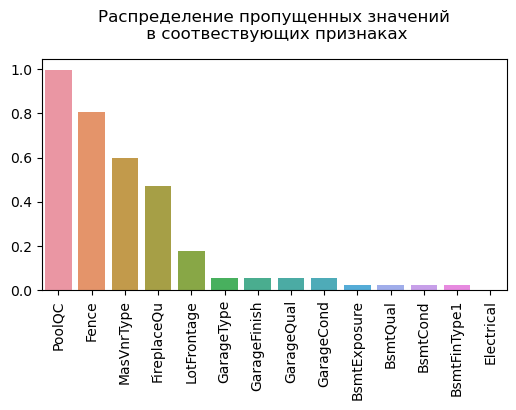

In [20]:
# Визуализируем информацию о пропусках.
feature_nulls = maska[maska > 0].index
plt.figure(figsize = (6, 3))
plt.title('Распределение пропущенных значений\n в соотвествующих признаках', y = 1.05)
sns.barplot(x = nulls.index, y = nulls.values)
plt.xticks(rotation = 90)
plt.show()

Лидерами по отсутствию значений являются: PoolQS (качество бассейна) и  Fence (тип забора). Видимо не во многих домах есть бассейн, тип забора или не указан или забор может пока отсуствовать. Данные признаки бесполезны, удалим их.

In [21]:
train.drop(columns = ['PoolQC', 'Fence'], inplace = True)
maska = train.isna().sum()
feature_nulls = maska[maska > 0].index

In [22]:
def fill_null(df: pd.DataFrame, list_col: list = None) -> pd.DataFrame:
    """
    Заполняет пропуски в указанных колонках

    Parameters:
    -----------
    df_notnull : pandas.DataFrame
    list_col   : list             - список колонок для обработки

    Returns:
    --------
    pandas.DataFrame - DataFrame с заполненными пропусками
    """
    # Созданием копию исходных данных, чтобы не изменить их.
    df_notnull = df.copy()
    
    # Применяем индивидуальный подход к заполнению пропусков.
    for col in df_notnull[list_col].columns:
        if col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'Electrical',
                   'FireplaceQu', 'GarageQual', 'GarageCond']:#, 'PoolQC']:
            df_notnull[col].fillna('None', inplace=True)
        elif col in ['GarageType', 'GarageFinish']:
            df_notnull[col].fillna("None", inplace=True)
#         elif col == 'GarageYrBlt':
#             df_notnull[col].fillna(1950, inplace=True)
        elif col in ['LotFrontage', 'MasVnrArea']:
            df_notnull[col].fillna(0, inplace=True)
        elif col == 'MasVnrType':
            df_notnull[col].fillna('None', inplace=True)
        elif col == 'BsmtFinType1':
            df_notnull[col].fillna('None', inplace=True)
#         elif col == 'Fence':
#             df_notnull[col].fillna('None', inplace=True)
    
    return df_notnull

In [23]:
# Применение функции заполнения пропусков.
train = fill_null(train, feature_nulls)

In [24]:
# Контроль пропусков.
train.isnull().sum().sum()

0

#### 7. Анализ целевой переменной <a id='анализ целевой переменной'></a>

##### 7.1  Диагностика целевой переменной на основе гистограммы распределения, Box plot и QQ Plot <a id='диагностика-целевой-переменной-на-основе-гистограммы-распределения-box-plot-и-qq-plot'></a>

In [25]:
# Теперь будем использовать копию исходного набора данных, чтобы тем самым создать контрольную точку 
# для  предстоящего моделирования.
newtrain = train.copy()

In [26]:
newtrain.shape[1]

61

In [27]:
def target_plot (df: pd.DataFrame, target_column: str = 'SalePrice'):
    """
    Функция строит ряд графиков, диагностирующих целевую переменную: гистограмму распределения,  Box plot для визуальной 
    оценки выбрасов, QQ Plot для анализа нормальности распределения. Дополнительно функция вычисляет искривление и эксцесс.
    
    Parameters:
    ----------
    df: pd.DataFrame
      Датафрейм с данными
    target_column: str 
      Имя колонки, содержащей целевую переменную. По умолчанию равна SalePrice.
    
    Returns:
    ----------
    None
      Строит выше указанные графики и выводит искривление и эксцесс в консоль. 
    """
    
    fig, axes = plt.subplots(1, 3, figsize = (15, 5))    
    fig.suptitle(f'АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ {target_column}', fontsize = 15, y = 1.05)
    
    target_data = df[target_column]   
    
    #1. Гистограмма
    sns.histplot(data = df, x = target_data, kde = True, ax = axes[0], bins = 40)
    axes[0].set_title(f'Гистограмма распределения', fontsize = 14)
    axes[0].set_xlabel(target_column, fontsize = 11)
    axes[0].set_ylabel('Частота', fontsize = 11)
    axes[0].axvline(target_data.mean(), color = 'red', linestyle = '--', label = f'Среднее: {target_data.mean():.2f}')
    axes[0].axvline(target_data.median(), color = 'green', linestyle = '--', label = f'Медиана: {target_data.median():.2f}')
    axes[0].legend()
    
    #2. Box plot
    sns.boxplot(data = df, x = target_data, ax = axes[1])
    axes[1].set_title(f'Box plot', fontsize = 16)
    axes[1].set_xlabel(f'{target_column}', fontsize = 11)
    
    #3. QQ Plot для проверки нормальности
    st.probplot(target_data, dist = 'norm', plot = axes[2])
    axes[2].set_title(f'QQ Plot', fontsize = 16)
    axes[2].set_xlabel('Теоретические квантили', fontsize = 11)
    axes[2].set_ylabel('Выборочные квантили', fontsize = 11)
    
    plt.tight_layout()
    plt.show()  
    
    print(f'Искривление: {target_data.skew():.2f}')
    print(f'Эксцесс: {target_data.kurtosis():.2f}')
    
    # Тест Шапиро-Уилка для оценки нормальности распределения
    
    stat, p = shapiro(target_data)
    
    if p > 0.5: 
        print(f'p-value: {p} --> Нормальное распределение')
    else:
        print(f'p-value: {p} --> Распределение не является нормальным')

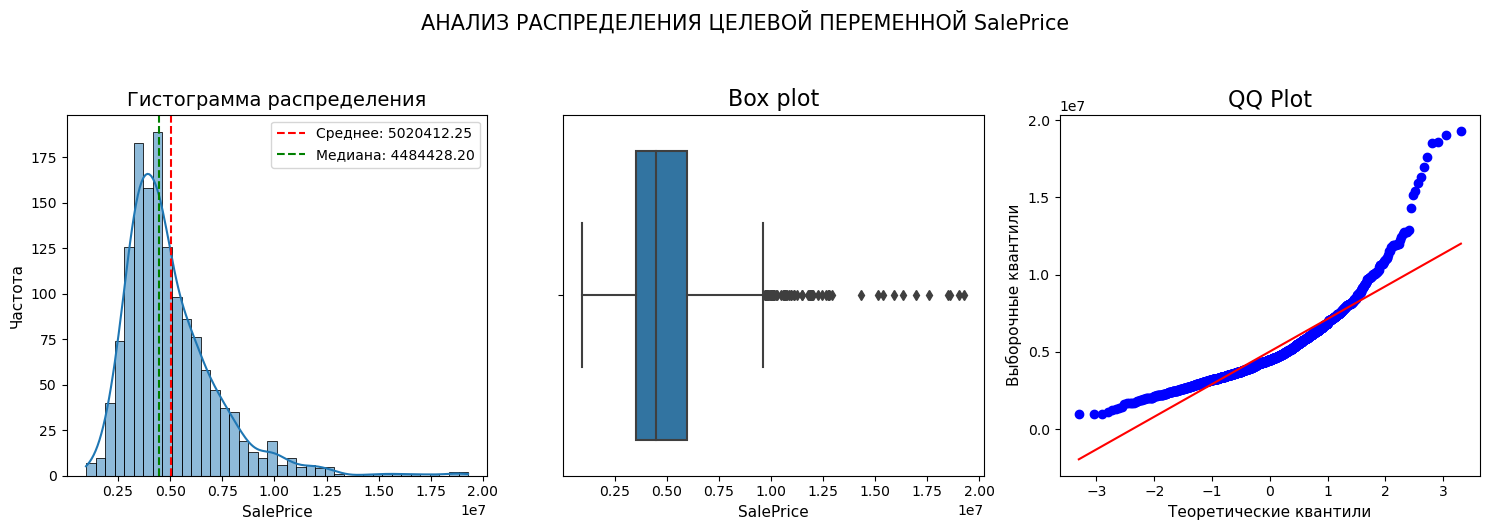

Искривление: 1.90
Эксцесс: 6.27
p-value: 8.695451815196263e-34 --> Распределение не является нормальным


In [28]:
target_plot(newtrain)

В исходном распределении наблюдается сильная правосторонняя асимметрия (skewness/искривление = 1.91), что сопровождается гетероскедастичностью — дисперсия ошибок растёт с ростом цены.

На рынке недвижимости гетероскедастичность естественна и ожидаема:

 - для дешёвых домов мало вариантов улучшений → малая вариация цен;

 - для дорогих домов много опций (бассейн, отделка, вид и т.д.) → большая вариация цен.

Наличие редких, но крайне дорогих объектов создаёт непропорционально большой разброс (дисперсия непостоянна). Это приводит к тому, что при использовании линейной модели ошибки будут усредняться с перекосом в сторону дорогих объектов. Модель будет плохо предсказывать цену "типичного" дома, уделяя чрезмерное внимание выбросам.

Высокий эксцесс (kurtosis = 6.28) показывает "тяжесть" хвостов распределения, то есть указывает на частую встречаемость экстремальных цен в обе стороны. Это приводит к смещённости оценок качества модели (MAE/RMSE) и расширяет доверительные интервалы.

##### 7.2  Нормализация целевой переменной при помощи логарифмического преобразования <a id='нормализация-целевой-переменной-при-помощи-логарифмического-преобразования'></a>

In [29]:
# Логарифмируем целевую переменную.
newtrain['SalePrice_log'] = np.log1p(newtrain.SalePrice)

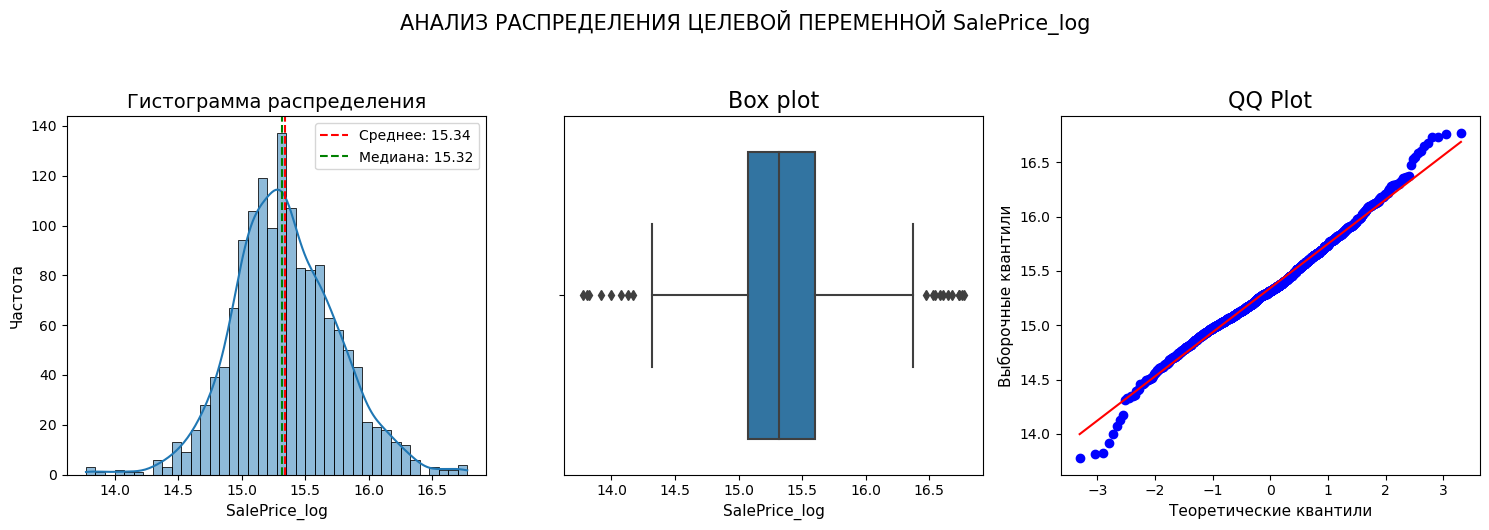

Искривление: 0.16
Эксцесс: 0.71
p-value: 5.246491623113257e-07 --> Распределение не является нормальным


In [30]:
target_plot(newtrain, 'SalePrice_log')

В результатае логарифмирования удалось снизить skewness в 12 раз. Эксцесс в 9 раз. P-value стало гараздо ближе к уровню значимости 0,05. 
Логарифмирование решило следующие проблемы:

 - переход от абсолютных различий (рубли) к относительным (проценты);

 - преобразование растущей дисперсии к постоянной (гомоскедастичность);

 - модель будет эффективнее предсказывать типичные дома, а не "гнаться" за элитными;

 - увеличится устойчивость модели к выбросам, предсказания будут более надёжными.
 
Логарифмирование не решило проблему ненормальности распределения, но помогло восстановить ключевые предположения линейных моделей: гомоскедастичность, нормальность остатков. 

In [31]:
# Проверка выбрасов с использованием критерия 3*IQR.
q1 = newtrain.SalePrice_log.quantile(0.25)
q3 = newtrain.SalePrice_log.quantile(0.75)
iqr = q3 - q1
upper_bold = q3 + 3 * iqr
lower_bold = q1 - 3 * iqr

newtrain.query('(SalePrice_log > @upper_bold) or (SalePrice_log < @lower_bold)').shape[0]


0

На графике Box Plot видно, что есть несколько домов с чуть более высокой ценой, и еще несколько домов с ценой ниже, чем обычно. После проверки распределения по правилу (*ниже первого квартиля: минус 3 * (межквартильное расстояние)/ выше третьего квартиля: плюс 3 * (межквартильное расстояние)*) стало видно, что выбросов как таковых нет.

#### 8. Определение числовых признаков, в распределении которых наблюдается сильное асимметрия/искривление и применение функции логарифмического преобразования к ним <a id='определение-числовых-признаков-в-распределении-которых-наблюдается-сильное-асимметрия-искривление-и-применение-функции-логарифмического-преобразования-к-ним'></a>

Отберем числовые признаки  и пролагорифмируем те, у которых коэффициент искривления больше 0,5 или  меньше -0,5

In [32]:
def features_log(df: pd.DataFrame, drop_list: list = None) -> pd.DataFrame:    
    """
    Функция определяет числовые признаки с сильным искривлением (skewness > |0.5|)
    и применяет к ним преобразование log1p (log(1 + x)).
    
    Parameters:
    -----------
    df : pd.DataFrame
        Исходный DataFrame с данными. Может содержать как числовые, так и категориальные признаки.
        
    drop_list : list, default=['Id', 'SalePrice', 'SalePrice_log']
        Список колонок, которые нужно исключить из анализа и преобразования.
        По умолчанию исключает:
        - Идентификатор (Id);
        - Целевую переменную в исходном виде (SalePrice);
        - Целевую переменную в логарифмированном виде (SalePrice_log).
    
    Returns:
    --------
    pd.DataFrame
        Копия исходного DataFrame с преобразованными признаками. 
        Применяет преобразование in-place к копии данных.
    """
        
    # Установка значений по умолчанию для исключаемых колонок drop_list.
    if drop_list is None:
        drop_list = ['Id', 'SalePrice', 'SalePrice_log']
    
    # Удаляем из набора данных drop_list и отбираем только числовые колонки.
    features_numeric = df.drop(columns = drop_list) \
                         .select_dtypes(include = np.number) \
                         .columns    
    
    # Получим Series с коэффициентом скошенности для каждой числовой колонки.
    features_skewed = df[features_numeric].apply(lambda x: x.skew())                                             
    
    # Сформируем список только тех колонок, для которых skew > 0.5.
    features_skewed = features_skewed[abs(features_skewed) > 0.5].index.to_list()    
    
    # Применяем логарифмирование к выбранным колонкам.
    for col in features_skewed:
        df[col] = np.log1p(df[col])
        
    return df

In [33]:
# Применение функции логарифмического преобразования к сильно асимметричным числовым признакам.
features_log(newtrain)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,has_pool,has_fireplaces,has_masonry,has_low_quality_area,has_enclosed_porch,has_garage,house_age,remod_age,total_area,SalePrice_log
0,1,house_2floor,19.8120,6.6670,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0000,0,1,0.0000,0.0000,0.6931,1.7918,1.7918,5.4781,15.4614
1,2,house_1floor,24.3840,6.7944,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0000,1,0,0.0000,0.0000,0.6931,3.4657,3.4657,5.4617,15.3496
2,3,house_2floor,20.7264,6.9529,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0000,1,1,0.0000,0.0000,0.6931,2.0794,1.9459,5.5310,15.5308
3,4,house_2floor,18.2880,6.7892,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0000,1,0,0.0000,0.6931,0.6931,4.5218,3.6109,5.4413,15.1519
4,5,house_2floor,25.6032,7.1898,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0000,1,1,0.0000,0.0000,0.6931,2.1972,2.1972,5.7416,15.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,house_2floor,18.8976,6.6019,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0000,1,0,0.0000,0.0000,0.6931,2.1972,2.0794,5.4912,15.3132
1456,1457,house_1floor,25.9080,7.1107,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0000,1,1,0.0000,0.0000,0.6931,3.4965,3.1355,5.8196,15.6683
1457,1458,house_2floor,20.1168,6.7346,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0000,1,0,0.0000,0.0000,0.6931,4.2485,1.6094,5.7851,15.9066
1458,1459,house_1floor,20.7264,6.8065,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0000,0,0,0.0000,0.6931,0.6931,4.1109,2.7081,5.3048,15.2779


#### 9. Анализ ранговых переменных <a id='анализ-ранговых-переменных'></a>

##### 9.1 Идентификация признаков, представляющих собой ранговые переменные <a id='идентификация-признаков-представляющих-собой-ранговые-переменные'></a>

Теперь проанализируем категориальные признаки для выявления тех, которые можно закодировать методом бинарного кодирования или label encoding. Затем проведём отбор признаков: выделим наиболее информативные, оказывающие значимое линейное влияние на целевую переменную, и исключим признаки, создающие мультиколлинеарность.

In [34]:
newtrain.shape[1]

62

In [35]:
def analyze_categorical_features(df: pd.DataFrame, list_cols: list, treshold: int) -> pd.DataFrame:    
    """
    Анализирует категориальные признаки: возвращает уникальные значения и их количество. Отбирает признаки 
    с количеством уникальных значений меньше заданного порога.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Исходный датафрейм для анализа.
    list_cols : list
        Список названий категориальных колонок для анализа.
    threshold : int
        Пороговое значение количества уникальных значений. Анализируются только признаки с nunique < threshold.
    
    Returns:
    --------
    pd.DataFrame
     Датафрейм со следующими колонками:
        - index: название признака (исходное название колонки);
        - val: массив уникальных значений признака;
        - cnt: количество уникальных значений.
    """
    # Подсчет количества уникальных значений в категориальных колонках и установка фильтра по заданному порогу.
    categoricals_cnt = df[list_cols].nunique()
    categoricals_cnt = categoricals_cnt[categoricals_cnt < treshold]
    
    # Создание колонки с перечнем уникальных значений и колонки с количеством уникальных значений.
    uniques = df[categoricals_cnt.index].apply(lambda x: x.unique()).to_frame(name = 'val')
    nuniques = df[categoricals_cnt.index].apply(lambda x: x.nunique()).to_frame(name = 'cnt')

    # Объединение данных в один датафрейм.
    data_categoricals = uniques.reset_index().merge(nuniques.reset_index(), on = 'index')                                                                           
    return data_categoricals

In [36]:
# Посмотрим на категориальные столбцы, в которых до 10 уникальных значений.
categorical_features = newtrain.select_dtypes(include = 'object').columns.to_list()
analyze_categorical_features(newtrain, categorical_features, 10)

,index,val,cnt
0,MSSubClass,"[house_2floor, house_1floor, house_1floor_atti...",8
1,Street,"[Pave, Grvl]",2
2,LotShape,"[Reg, IR1, IR2, IR3]",4
3,LandContour,"[Lvl, Bnk, Low, HLS]",4
4,Utilities,"[AllPub, NoSeWa]",2
5,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
6,LandSlope,"[Gtl, Mod, Sev]",3
7,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
8,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
9,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",8


В наборе данных присутствует ряд признаков, представляющих собой ранговые переменные, которые отражают качество или состояние различных элементов объекта. Для этих признаков выполним порядковое кодирование в соответствии со смысловой нагрузкой: более высокое качество соответствует большей стоимости объекта.<br> 
Признаки MSSubClass, HouseStyle, BldgType имеют похожий смысл. Удалим MSSubClass, HouseStyle, оставив только BldgType

##### 9.2 Кодирование ранговых переменных в числовые значения <a id='кодирование-ранговых-переменных-в-числовые-значения'></a>

In [37]:
def encoding_categorical_features(df: pd.DataFrame) -> pd.DataFrame:
    """
        Кодирует порядковые категориальные признаки в числовые значения.
        Расшифровка рейтинговых значений: 
            'Ex'- excellent - отличное
            'Gd' - Good - хорошее
            'TA' — Typical - типичное (аналог среднего)
            'Fa' - Fair - удовлетворительное качество
            'Po' - Poor - плохое
            'None' / 'No' - отсутствует
            
             Для признака осещенность допольнительно:
            'Av' - Average - средний уровень освещенности
            'Mn' - Minimum - минимальный уровень  

        Parameters
        ----------
        df: pd.DataFrame
            Исходный DataFrame с данными        

        Returns
        -------
        pd.DataFrime
            Датафрейм с уже кодированнными ранговыми признаками
            
    """
    
    # Создаем копию, чтобы не изменить исходные данные.
    df_encoding = df.copy()
    
    # Применяем индивидуальный подход к колонке или к группе колонок. 
    df_encoding[['ExterQual', 'BsmtQual', 'KitchenQual']] = df_encoding[['ExterQual', 'BsmtQual', 'KitchenQual']] \
                                                        .applymap({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}.get)
    df_encoding['BsmtExposure'] = df_encoding['BsmtExposure'] \
                              .map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No':0, 'None': 0})
    df_encoding[['ExterCond', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond']] = \
                                df_encoding[['ExterCond', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond']] \
                                .applymap({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}.get)
    #df_encoding['PoolQC'] = df_encoding['PoolQC'].map({'Ex': 3, 'Gd': 2, 'Fa': 1, 'None': 0})

    # PavedDrive - Качество асфальта подъездной дороги:
    #'Y' — Yes     — Полностью асфальтированная/замощенная
    #'P' — Partial — Частично асфальтированная/замощенная
    #'N' — No      — Грунтовая/без покрытия
    df_encoding['PavedDrive'] = df_encoding['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})
    # CentralAir - Центральное кондиционирование воздуха:
    # 'Y' — Yes — Установлено
    # 'N' — No  — Отсутствует
    df_encoding['CentralAir'] = df_encoding['CentralAir'].map({'Y': 1, 'N': 0})  
    # Functional - Оценка жилой функциональности дома относительно сделанного ремонта: 
    # Typ  - Typical Functionality - Дом полностью пригоден для проживания,соответствует нормам - 1 (лучший)
    # Min1 - Minor Deductions 1    - Нужен мелкий ремонт (косметический) - 2
    # Min2 - Minor Deductions 2    - Нужен косметический ремонт - 3
    # Mod  - Moderate Deductions   - Нужен средний ремонт - 4
    # Maj1 - Major Deductions 1    - Нужен капитальный ремонт - 5
    # Maj2 - Major Deductions 2    - Аварийное состояние, но теоретически можно жить - 6
    # Sev  - Severely Damaged      - Непригоден для проживания, требуется полная реконструкция - 7 (худший)
    df_encoding['Functional'] = df_encoding['Functional'].map({'Typ' : 1,
                                             'Min1': 2,
                                             'Min2': 3,
                                             'Mod' : 4,
                                             'Maj1': 5,
                                             'Maj2': 6, 
                                             'Sev' : 7
                                             })
    # GarageFinish - Степень внутренней отделки гаража: 
    # 'Fin'      : 'Finished',          # Полностью отделанный
    # 'RFn'      : 'Rough_Finished',    # Черновая отделка
    # 'Unf'      : 'Unfinished',        # Без отделки
    # 'No_Garage': 'No_Garage'          # Нет гаража
    df_encoding['GarageFinish'] = df_encoding['GarageFinish'].map({'Fin'      : 4,
                                                 'RFn'      : 3,
                                                 'Min2'     : 2,
                                                 'Unf'      : 1,
                                                 'None': 0
                                                 })
    # LandSlope - Уклон/наклон земельного участка: 
    # Gtl — Gentle slope   — Пологий уклон (0-10%) => Идеально для строительства
    # Mod — Moderate slope — Умеренный уклон (10-20%) => Требует дополнительных мер при строительстве 
    # Sev — Severe slope   — Крутой/сильный уклон (>20%) => Серьезные проблемы для строительства и использования
    df_encoding['LandSlope'] = df_encoding['LandSlope'].map({'Gtl' : 0,
                                           'Mod' : 1,
                                           'Sev' : 2                                                           
                                          })
    # MSSubClass, BldgType, HouseStyle о типе объекта. Есть смысл оставить только одну колонку BldgType
    df_encoding.drop(columns = ['MSSubClass', 'HouseStyle'], inplace = True)
    return df_encoding

In [38]:
# Применим функцию кодирования рейтинговых переменных
newtrain = encoding_categorical_features(newtrain)

In [39]:
newtrain.shape[1]

60

In [40]:
# Проверим корректно ли прошло кодирование.
categorical_features = [znach for znach in categorical_features if znach not in ['MSSubClass', 'HouseStyle']]
analyze_categorical_features(newtrain, categorical_features, 10)

,index,val,cnt
0,Street,"[Pave, Grvl]",2
1,LotShape,"[Reg, IR1, IR2, IR3]",4
2,LandContour,"[Lvl, Bnk, Low, HLS]",4
3,Utilities,"[AllPub, NoSeWa]",2
4,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
5,LandSlope,"[0, 1, 2]",3
6,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
7,BldgType,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",5
8,RoofMatl,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta...",8
9,MasVnrType,"[BrkFace, None, Stone, BrkCmn]",4


#### 10. Идентификация признаков с доминирующей категорией и очистка набора данных от них <a id='идентификация-признаков-с-доминирующей-категорией-и-очистка-набора-данных-от-них'></a>

Посмотрим на остальные категориальные признаки при помощи визуализации распределения. Определим те, которые неинформативны.

In [41]:
categoricals = newtrain.select_dtypes(include = 'object').columns.to_list()
categoricals

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtFinType1',
 'Heating',
 'Electrical',
 'GarageType',
 'SaleType']

In [42]:
def plot_categorical_distributions(df: pd.DataFrame, list_col: list):
    """
        Визуализирует распределение категориальных признаков в виде сетки barplot.

        Parameters:
        -----------
        df : pd.DataFrame
            Датафрейм с данными
        categorical_columns : list
            Список категориальных колонок для визуализации   

        Returns:
        --------
        None
            Отображает сетку графиков
    """
    # Определим число строк и колонок для разбиения графической области области. 
    n_rows = math.ceil(len(list_col) / 3)
    n_cols = 3
    
    # Создаем сетку подграфиков в одной фигуре.
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (14, 4 * n_rows))
    axes = axes.flatten()
    fig.suptitle('Анализ распределения категориальных признаков', fontsize = 15, y = 1.002)

    # Рисуем barplot для каждого категориального признака на своем графическом поле.
    for i, col in enumerate(list_col):
        value_counts = df[col].value_counts(normalize = True)
        sns.barplot(x = value_counts.index, y = value_counts.values, ax = axes[i])
        axes[i].set_title(col, fontsize = 13)
        axes[i].tick_params(axis = 'x', rotation=90) 

    # Убираем пустые подграфики.    
    for i in range(len(list_col), len(axes)):
        axes[i].axis('off')
        
    # Корректируем расстояния между подграфиками.     
    plt.tight_layout() 
    plt.show()

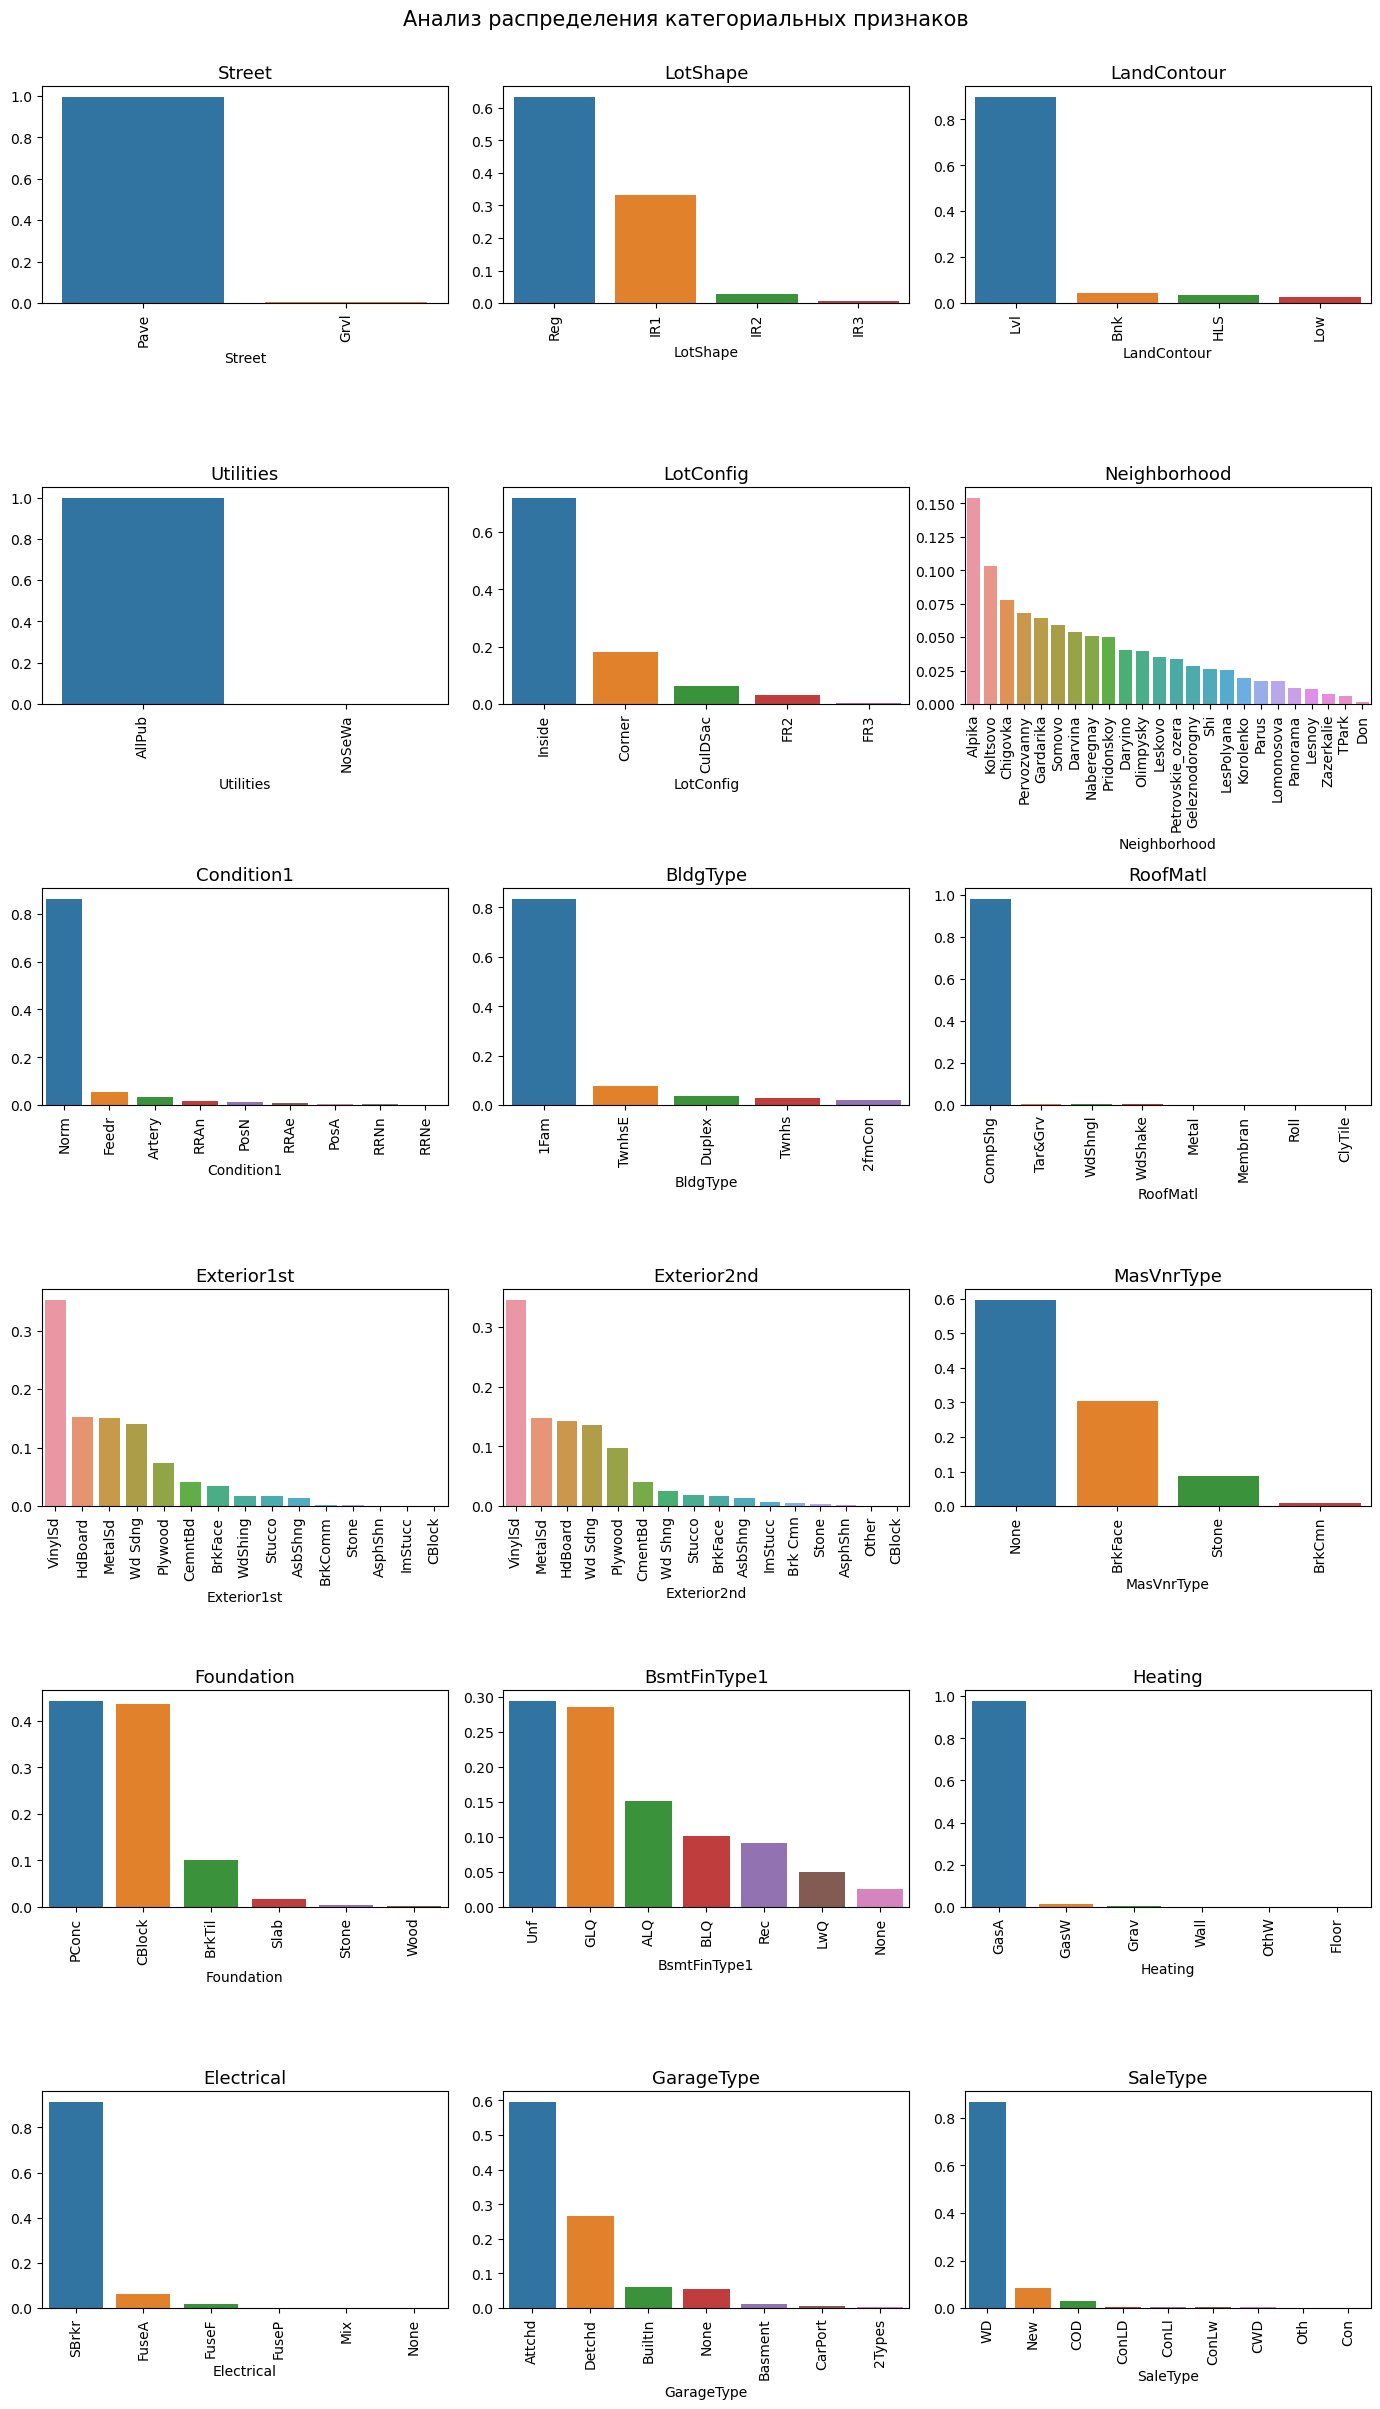

In [43]:
# Применение функции распределения категориальных признаков.
plot_categorical_distributions(newtrain, categoricals)

Признаки с доминирующей категорией (>80%) имеют очень низкую информативность. Удалим данные признаки из набора данных.

In [44]:
# Отберем колонки с доминирующей категорией
drop_categoricals = [col for col in categoricals \
                         if newtrain[col].value_counts(normalize = True) \
                         [newtrain[col].value_counts(normalize = True) > 0.8].any()]
drop_categoricals

['Street',
 'LandContour',
 'Utilities',
 'Condition1',
 'BldgType',
 'RoofMatl',
 'Heating',
 'Electrical',
 'SaleType']

In [45]:
# Очищаем датасет от признаков с доминирующей категорией.
newtrain.drop(columns = drop_categoricals, inplace = True)

In [46]:
newtrain.shape[1]

51

#### 11. Кодирование оставшихся категориальных признаков <a id='кодирование-оставшихся-категориальных-признаков'></a>


In [47]:
# Остальные категориальные признаки кодируем при помощи pd.get_dummies.
newtrain = pd.get_dummies(newtrain,
                          newtrain.select_dtypes(include = 'object').columns,
                          drop_first = True)

In [48]:
# Контроль типов данных.
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 121 entries, Id to GarageType_None
dtypes: bool(79), float64(19), int32(2), int64(21)
memory usage: 591.3 KB


In [49]:
# Приведем все типы данных к одному типу float.
newtrain = newtrain.astype(float)
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 121 entries, Id to GarageType_None
dtypes: float64(121)
memory usage: 1.4 MB


#### 12. Оптимизация набора данных исходя из коэффициента корреляции признаков с целевой переменной <a id='оптимизация-набора-данных-исходя-из-коэффициента-корреляции-признаков-с-целевой-переменной'></a>

##### 12.1 Создание стилизованной таблицы корреляции признаков с целевой переменной <a id='создание-стилизованной-таблицы-корреляции-признаков-с-целевой-переменной'></a>

In [50]:
def table_correlation_target(df: pd.DataFrame,
                             target_name: str = None,
                             drop_list: list = None) -> pd.DataFrame:
    """
    Создает стилизованную таблицу корреляций признаков с целевой переменной.
    
    Функция вычисляет корреляцию всех числовых признаков с указанной целевой переменной, исключает указанные колонки, 
    сортирует результаты по убыванию корреляции и применяет цветовую визуализацию для быстрой оценки силы
    и направления корреляции.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Исходный DataFrame с данными. Должен содержать числовые признаки и целевую переменную.
        
    target_name : str, optional, default='SalePrice'
        Название целевой колонки для расчета корреляций.
        
    drop_list : list, optional, default=['Id', 'SalePrice', 'SalePrice_log']
        Список колонок для исключения из таблицы корреляций. (Идентификаторы и производные целевой переменной).
    
    Returns:
    --------
    pandas.io.formats.style.Styler
        Стилизованный DataFrame со следующими характеристиками:
        - Одна колонка с названиями признаков (индекс);
        - Одна колонка со значениями корреляции Пирсона с целевой переменной;
        - Применена столбчатая диаграмма в ячейках (data bars):
            * Красные столбцы для отрицательных корреляций;
            * Зеленые столбцы для положительных корреляций;
        - Сортировка по убыванию корреляции (самые сильные положительные сверху).
    """
    # Установка значений по умолчанию для target_name и drop_list.
    if target_name is None:
        target_name = 'SalePrice'
    if drop_list is None:
        drop_list = ['Id', 'SalePrice', 'SalePrice_log']
    
    # Создание таблицы корреляций признаков с целевой переменной.
    target_corr = df.corr()[[target_name]] \
                                            .drop(index = drop_list) \
                                            .sort_values(by = target_name, ascending = False)
    # Применение стилей для визуализации.
    return target_corr.style.bar(subset = target_name, align = 'zero', color = ['#ff7f7f', '#7fbf7f'])

In [51]:
# Применение функции таблицы корреляций признаков с целевой переменной.
table_correlation_target(newtrain)

,SalePrice
OverallQual,0.772438
total_area,0.739802
ExterQual,0.674083
KitchenQual,0.652068
GarageCars,0.625784
BsmtQual,0.608387
1stFlrSF,0.578397
FullBath,0.545350
GarageFinish,0.543042
TotRmsAbvGrd,0.505351


##### 12.2 Отбор признаков на основании порогового значения коэффициента корреляции <a id='отбор-признаков-на-основании-порогового-значения-коэффициента-корреляции'></a>

In [52]:
def features_for_optimal(df: pd.DataFrame,
                         trashold: float,
                         target_name: str = None,
                         drop_list: list = None) -> list:
    """
    Функция возвращает список признаков с корреляцией ниже заданного порога с целевой переменной.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Исходный DataFrame
    threshold : float
        Порог корреляции (абсолютное значение)
    col_name : str, optional
        Имя целевой колонки (по умолчанию 'SalePrice')
    drop_list : list, optional
        Список колонок для исключения из результата
    
    Returns:
    --------
    list : Список признаков с корреляцией < threshold
    """
    # Установка значений по умолчанию для target_name и drop_list.
    if target_name is None:
        target_name = 'SalePrice'
    if drop_list is None:
        drop_list = ['Id', 'SalePrice', 'SalePrice_log']
        
    # Создание таблицы корреляций признаков с целевой переменной.     
    target_corr = df.corr()[[target_name]] \
                                            .drop(index = drop_list) \
                                            .sort_values(by = target_name, ascending = False)
    
    # Создание маски для фильтрации. Маска отбирает те значения, которые по модулю меньше порога.
    maska = target_corr[target_name].abs() < trashold  
    
    return target_corr[maska].index.tolist()

In [53]:
# Применение функции получения списка признаков, корреляция которых с целевой переменной ниже заданного порога.
drop_features = features_for_optimal(newtrain, 0.3)
print(f'Всего колонок: {newtrain.shape[1]}    К удалению: {len(drop_features)}\nОстаток: {newtrain.shape[1] - len(drop_features)}')

Всего колонок: 121    К удалению: 88
Остаток: 33


In [54]:
# Применение функции получения списка признаков на основании выставленного порога корреляции с target.
drop_features = features_for_optimal(newtrain, 0.3)

In [55]:
# Удалим из набора данных признаки с низкой корреляцией.
newtrain.drop(columns = drop_features, inplace = True)

In [56]:
newtrain.shape[1]

33

In [57]:
# Посмотрим на получившуюся таблицу коррелиции признаков с целевой переменной.
saleprice_corr = table_correlation_target(newtrain)
saleprice_corr

,SalePrice
OverallQual,0.772438
total_area,0.739802
ExterQual,0.674083
KitchenQual,0.652068
GarageCars,0.625784
BsmtQual,0.608387
1stFlrSF,0.578397
FullBath,0.545350
GarageFinish,0.543042
TotRmsAbvGrd,0.505351


#### 13. Устранение мультиколлинеарности в наборе данных <a id='устранение-мультиколлинеарности-в-наборе-данных'></a>

##### 13.1  Идентификация мультиколлинеарных признаков <a id='идентификация-мультиколлинеарных-признаков'></a>

Идентифицируем мультиколлинеарные признаки в наборе данных.

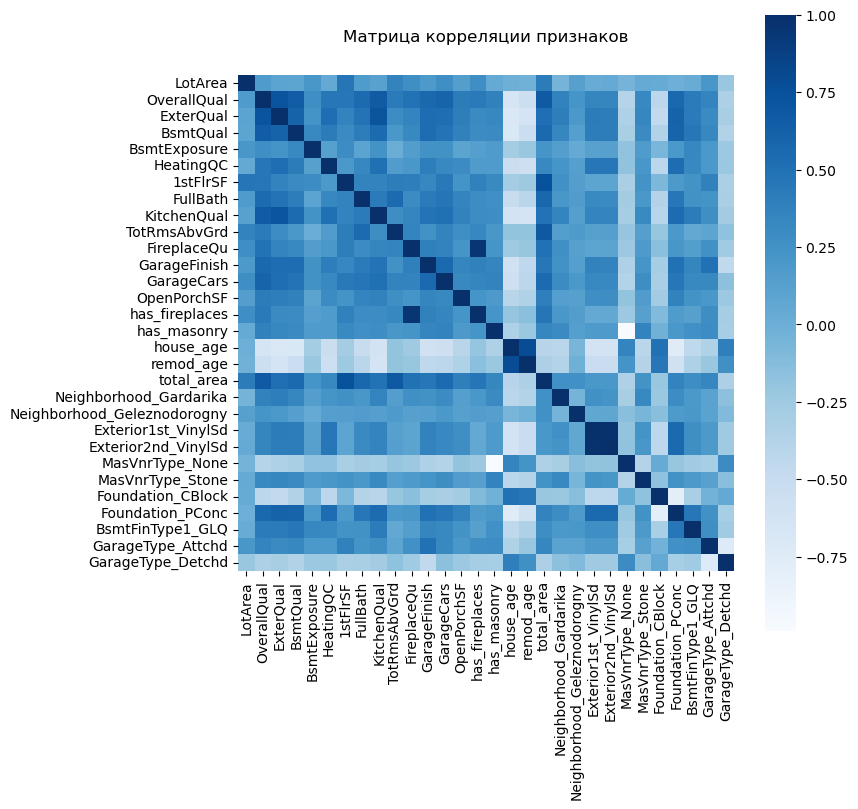

In [58]:
# Построим тепловую карту и сделаем предварительный визуальный анализ наличия мультиколлинеарности.
matrix_corr = newtrain.drop(columns = ['SalePrice', 'SalePrice_log', 'Id']).corr()
plt.figure(figsize = (8, 8))
sns.heatmap(matrix_corr, 
             cmap = 'Blues', 
             annot = False,
             square = True)
plt.title('Матрица корреляции признаков', y = 1.05)
plt.show()

Создадим таблицу в которой соберем признаки с коэффициентом корреляции Пирсона больше выбранного парога.

In [59]:
def data_correlation(matrix: pd.DataFrame, treshold: float = None) -> pd.DataFrame:    
    """
    Функция выявляет сильные корреляции между признаками в матрице корреляции; фильрует матрицу корреляции, 
    оставляя только те пары признаков, корреляция между которыми превышает заданный порог (по модулю).

    Parameters:
    -----------
    matrix : pd.DataFrame
        Квадратная матрица корреляции, полученная методом df.corr().

    threshold : float, default=0.7
        Пороговое значение корреляции (по модулю). 
        Пары признаков с |correlation| > threshold будут включены в результат.
        Рекомендуемые значения:
        - 0.7: умеренный порог для выявления сильных корреляций;
        - 0.8: строгий порог для выявления очень сильных корреляций;
        - 0.9: очень строгий порог для выявления почти линейных зависимостей.

    Returns:
    --------
    pd.DataFrame
        DataFrame с тремя колонками:
        - column_1 : str - название первого признака
        - column_2 : str - название второго признака  
        - correlation : float - значение корреляции между признаками

        DataFrame отсортирован по убыванию абсолютного значения корреляции.
        Исключает диагональные элементы (корреляция признака с самим собой = 1.0).
    """
    
    # Установка значения по умолчанию для порогового значения treshold.
    if treshold is None:
        treshold = 0.7
        
    # Создание копии, чтобы не изменить исходные данные.
    corr_df = matrix.copy() 
        
    # Создание маски для фильтрации. Маска выбирает элементы, которые:
    #   - по модулю больше threshold (сильная корреляция);
    #   - меньше 1 (исключаем корреляцию признака с самим собой).        
    maska = ((abs(corr_df) < 1) & (abs(corr_df) > treshold))
    
    # Применение маски к матрице с последующим преобразование матрицы из широкого формата в длинный.
    corr_df = corr_df.where(maska).stack().reset_index()
    
    # Переименование колонок.
    corr_df.columns = ['column_1', 'column_2', 'correlation']
    
    # Удаление дубликатов. Т к каждая пара признаков встречается дважды, оставляем только одну запись 
    # для каждой уникальной корреляции.
    corr_df.drop_duplicates(subset = 'correlation', inplace = True)
    
    return corr_df.sort_values(by = 'correlation', ascending = False)

In [60]:
# Применение функции отбора высоко кореллированных признаков.
matrix_multicorr = data_correlation(matrix_corr).reset_index().drop(columns = 'index')
matrix_multicorr

,column_1,column_2,correlation
0,Exterior1st_VinylSd,Exterior2nd_VinylSd,0.9775
1,FireplaceQu,has_fireplaces,0.9545
2,house_age,remod_age,0.7860
3,1stFlrSF,total_area,0.7456
4,OverallQual,ExterQual,0.7248
5,ExterQual,KitchenQual,0.7150
6,ExterQual,house_age,-0.7008
7,GarageType_Attchd,GarageType_Detchd,-0.7302
8,house_age,Foundation_PConc,-0.7435
9,Foundation_CBlock,Foundation_PConc,-0.7814


##### 13.2 Создание списка к удалению <a id='создание-списка-к-удалению'></a>

Сформируем список к удалению, основываясь на силе влияния признака на целевую переменную.

In [61]:
def select_features_drop(matrix_multicorr, saleprice_corr: pd.DataFrame) -> list:
    """
    Отбирает признаки для удаления на основе мультиколлинеарности.    
    Алгоритм итеративно выбирает, какой из двух сильно коррелирующих признаков удалить, основываясь на их корреляции 
    с целевой переменной. Удаляется тот признак, который имеет меньшую (по модулю) корреляцию с целевой переменной.

    Parameters:
    -----------
    matrix_multicorr : pd.DataFrame
        DataFrame с сильно коррелирующими парами признаков, полученный из функции data_correlation().
        Ожидается формат с колонками: ['column_1', 'column_2', 'correlation']

    saleprice_corr : pd.DataFrame
        DataFrame с корреляциями всех признаков с целевой переменной.

    Returns:
    --------
    list
        Список названий признаков, рекомендованных для удаления.

    """
    # Создание копии данных, чтобы не изменить исходный датафрейм.
    df = matrix_multicorr.copy()
    
    # Инициализация списка признаков для удаления.
    features_drop = []
    
    # Отбор признаков для удаления.
    while not df.empty:
        val1 = df.iloc[0, 0] # Название первого признака.
        val2 = df.iloc[0, 1] # Название второго признака.
        if abs(saleprice_corr.data.loc[val1].item()) < abs(saleprice_corr.data.loc[val2].item()):
            minimum = val1
            features_drop.append(val1)
        else:
            minimum = val2
            features_drop.append(val2)
        index_list_drop = df.query("column_1 == @minimum or column_2 == @minimum").index.tolist()
        df = df.drop(index = index_list_drop)
        
    return features_drop    

In [62]:
# Применение функции отбора признаков к удалению для устранения мультиколлинеарности.
drops = select_features_drop(matrix_multicorr, saleprice_corr)
drops

['Exterior1st_VinylSd',
 'has_fireplaces',
 'remod_age',
 '1stFlrSF',
 'ExterQual',
 'GarageType_Attchd',
 'Foundation_PConc',
 'has_masonry']

In [63]:
data_correlation(newtrain.drop(columns = drops + ['SalePrice', 'SalePrice_log', 'Id']).corr())

,column_1,column_2,correlation


In [64]:
newtrain.shape[1]

33

In [65]:
# Посмотрим на итоговую таблицу коррелиции признаков с целевой переменной.
saleprice_corr = table_correlation_target(newtrain.drop(columns = drops))
saleprice_corr

,SalePrice
OverallQual,0.772438
total_area,0.739802
KitchenQual,0.652068
GarageCars,0.625784
BsmtQual,0.608387
FullBath,0.545350
GarageFinish,0.543042
TotRmsAbvGrd,0.505351
FireplaceQu,0.502403
BsmtFinType1_GLQ,0.433592


##### 13.3 Оценка важности признаков <a id='оценка-важности-признаков'></a>

В результате ручного отбора признаков сформирован компактный набор из 22 наиболее значимых переменных, демонстрирующих сильную статистическую связь с целевой переменной SalePrice. <br>

Топ-5 лидирующих факторов:
  - OverallQual - общее качество материалов отделки дома;
  - total_area  - общая площадь;
  - KitchenQual	- состояние кухни;
  - GarageCars  - размер гаража в зависимости от вместимости автомобилей;
  - BsmtQual    - размер подвала.<br>
  
Как можно заметить инвестиции в общее качество постройки дают максимальную доходность при продаже.<br>
Факторы, снижающие стоимость:
  - house_age         - возраст объекта - сильнейший негативный фактор, каждый год старения снижает стоимость;
  - MasVnrType_None   - тип облицовки - экономия на облицовочных материалах играет на понижение цены при продаже;
  - GarageType_Detchd - отдельно стоящий гараж → менее удобно;
  - Foundation_CBlock - тип фундамента - бетонные блоки → менее престижно.
  
Локационные преимущества:
  - Neighborhood_Gardarika      - пригородный поселок "Гардарика" как премиум-локация;
  - Neighborhood_Geleznodorogny - Железнодорожный район с хорошей транспортной доступностью.

In [66]:
# Удаляем мультиколлинеарные колонки и колонки, которые уже невостребованы ('SalePrice', 'Id').
newtrain = newtrain.drop(columns = ['SalePrice', 'Id'] + drops)
newtrain.shape[1]

23

#### 14. Подготовка данных для дальнейшего моделирования <a id='подготовка-данных-для-дальнейшего-моделирования'></a>

##### 14.1 Подготовка обучающей выборки и валидационной <a id='подготовка-обучающей-выборки-и-валидационной'></a>

Для пет-проекта используем только train/val разделение. Test выборка отсутствует, оцениваем на validation set. В production потребовалась бы отдельная test выборка.

In [67]:
# Из исходных данных, в которых были только заполнены пропущенные значения и проведен Feature Engineering,
# выделим целевую переменную SalePrice и обучающую выборку.
y  = train.SalePrice
X  = train.drop(columns = ['SalePrice', 'Id'])

In [68]:
# Разделим данные на обучающие и валидационные.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 55)

Для решения задачи прогнозирования цен на недвижимость применим подход с использованием пяти различных моделей машинного обучения, что позволяет учесть сильные стороны каждого алгоритма:

Линейные модели (Linear Regression, Ridge Regression) обеспечивают интерпретируемость и работают хорошо при выполнении строгих статистических предположений (линейность, гомоскедастичность, отсутствие мультиколлинеарности), что требует тщательной предобработки данных.

Random Forest демонстрирует устойчивость к нелинейным зависимостям и мультиколлинеарности, не требуя масштабирования признаков, что упрощает подготовку данных по сравнению с линейными моделями.

LightGBM сочетает высокую скорость обучения с хорошей точностью, но требует предварительного кодирования категориальных признаков и явного указания их при обучении.

CatBoost, разработанный специально для работы с категориальными признаками, автоматически обрабатывает их без предварительного кодирования, что значительно упрощает пайплайн подготовки данных и снижает риск ошибок при преобразовании.

Для baisline моделирования будем использовать ансамлевые модели "из коробки", проведем оценку результата и при необходимости проведем подбор гиперпараметров. Такой многоуровневый подход позволит не только получить качественные прогнозы, но и проанализировать данные с разных методологических сторон, выявляя наиболее значимые факторы, влияющие на стоимость недвижимости.

In [69]:
# Объединяем данные, т к подготовка для каждого алгоритма будет с учетом индивидуальных особенностей. 
# Фиксируем границу разделения. 
border = X_train.shape[0]
all_train = pd.concat([X_train, X_test], ignore_index = True)
y = pd.concat([y_train, y_test], ignore_index = True)
all_train = all_train.join(y)
all_train.shape

(1459, 60)

In [70]:
def split_back_data(df: pd.DataFrame, target_col: str, treshold: int, is_log: bool = True) -> tuple:
    
    """
    Функция разделяет исходные данные на обучающие и валидационные по заданному номеру строки, предоставляет
    возможность логарифмического преобразования целевой переменной.
    
    Parametrs:
    ----------
    df: pd.DataFrame
        Исходный датафрейм с данными.        
    target_col: str
        Название колонки, содержащей целевую переменную для прогнозирования.        
    treshold: int
        Количество наблюдение для включения в обучающую выборку.
        Все наблюдения с индексами >= treshold поппадут в валидационную.        
    is_log: bool, optional, default = True
        Флаг применения логарифмического преобразования к целевой переменной.
        Если True, применяется np.log1p() для стабилизации дисперсии и нормализации распределения.
        
   Returns:
   --------
   X_train: pd.DataFrame - обучающая выборка.
   X_test: pd.DataFrame  - валидационная выборка.
   y_train: pd.Series    - целевая переменная обучающей выборки.
   y_test: pd.Series     - целевая переменная валидационной выборки.
    
    """
    
    X_train = df.iloc[:treshold].drop(columns = target_col)
    X_test  = df.iloc[treshold:].drop(columns = target_col)
    y_train = df.iloc[:treshold][target_col]
    y_test  = df.iloc[treshold:][target_col]
    
    if is_log:
        y_train = np.log1p(df.iloc[:treshold][target_col])
        y_test  = np.log1p(df.iloc[treshold:][target_col])  
    return X_train, X_test, y_train, y_test

##### 14.2 Предобработка данных для линейных моделей <a id='предобработка-данных-для-линейных-моделей'></a>

In [71]:
def linear_preparation(all_train: pd.DataFrame, target_col: str, treshold: int,
                       drop_categoricals: list) -> tuple:
    
    """
    Функция для предобработки данных для линейных моделей.
    
    Parametrs:
    ----------
    all_train : pd.DataFrame
        Исходный обучающий датафрейм.
    target_col : str
        Название целевой переменной.
    treshold : int
        Порог для разделения данных на train/test.
    drop_categoricals : list
        Список категориальных признаков для удаления.
        
    Returns:
    -----------
    X_train_scaled : np.ndarray
        Масштабированные обучающие данные
    X_test_scaled : np.ndarray
        Масштабированные валидационные данные
    y_train_log : pd.Series
        Логарифмированная целевая переменная для обучающей выборки
    y_test_log : pd.Series
        Логарифмированная целевая переменная для валидационной выборки
    """
    
    # Создаем копию данных, чтобы не изменить исходный датафрейм.
    df = all_train.copy()    

    # Применяем логарифмическое преобразование к числовым признакам (кроме целевой переменной).
    df = features_log(df, drop_list = [target_col])    
    
    # Кодируем порядковые категориальные признаки.
    df = encoding_categorical_features(df)
   
    # Удаление категориальных признаков с доминирующей категорией.
    df.drop(columns = drop_categoricals, inplace = True)
    
    # Применяем One-Hot Encoding к оставшимся категориальным признакам.
    # drop_first=True для избежания дамми-ловушки в линейных моделях.
    df = pd.get_dummies(df,
                        df.select_dtypes(include = 'object').columns,
                        drop_first = True)
    
    # Преобразуем все данные в float64 для совместимости с sklearn.
    df = df.astype(np.float64)
    
    # Формирование списка признаков к удалению на основании коэффициента корелляции признаков с целевой переменной.
    drop_features = features_for_optimal(df, 0.3, target_name = target_col, drop_list = [target_col])    
    df.drop(columns = drop_features, inplace = True) 
    
    # Формирование таблицы, содержащей корреляции признаков с целевой переменной.
    corr_target = table_correlation_target(df, target_name = target_col, drop_list = [target_col])    
    
    # Матрица корреляций между признаками.
    corr = df.drop(columns = [target_col]).corr()
    
    # Табличный отбор только тех признаков, корелляция между которыми превышает установленный порог.
    multicorr = data_correlation(corr).reset_index().drop(columns = 'index')
    
    # Формирование списка признаков к удалению с целью устранения миультиколлинеарности.
    drops = select_features_drop(multicorr, corr_target)
   
    # Очистка исходных данных от мультиколлинеарных признаков.
    df.drop(columns = drops, inplace = True)     
    
    # Разделяем данные на обучающую и валидационную выборки.
    # is_log=True указывает, что целевая переменная уже логарифмирована.
    X_train, X_test, y_train_log, y_test_log = split_back_data(df, target_col = target_col, treshold = treshold, is_log = True)
    
    # Масштабирование признаков для линейных моделей.
    scaled = StandardScaler()
    X_train_scaled = scaled.fit_transform(X_train)
    X_test_scaled = scaled.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train_log, y_test_log

##### 14.3 Предобработка данных для LightGBM и Random Forest <a id='предобработка-данных-для-lightgbm-и-random-forest'></a>

In [72]:
def lgbm_rf_preparetion (all_train: pd.DataFrame,  target_col: str, treshold: int) -> tuple:
    
    """
    Функция для предобработки данных для модели LightGBM и Random Forest.
    
    Parametrs:
    ----------
    all_train : pd.DataFrame
        Исходный обучающий датафрейм.
    target_col : str
        Название целевой переменной.
    treshold : int
        Порог для разделения данных на train/test.    
        
    Returns:
    -----------
    X_train : np.ndarray
        Обучающие данные.
    X_test : np.ndarray
        Валидационные данные.
    y_train_log : pd.Series
        Логарифмированная целевая переменная для обучающей выборки.
    y_test_log : pd.Series
        Логарифмированная целевая переменная для валидационной выборки.
    """
    
    # Создаем копию данных, чтобы не изменить исходный датафрейм.
    df = all_train.copy()   

    # Формируем списк категориальных переменных.
    total_categoricals = df.select_dtypes(include = 'object').drop(columns = ['MSSubClass', 'HouseStyle']).columns.tolist()   
    
    # Кодируем порядковые категориальные признаки.
    df = encoding_categorical_features(df)

    # Кодируем остальные категориальные признаки при помощи OrdinalEncoder.
    encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',
                             unknown_value  = -1,
                             dtype = np.int32, # Экономия памяти
                             categories = 'auto' # Автоопределение категорий
                             )
    encoder_list = df.select_dtypes(include = 'object').columns.tolist()
    df[encoder_list] = encoder.fit_transform(df[encoder_list])    
    
    # Разделяем данные на обучающую и валидационную выборки.
    # is_log=True указывает, что целевая переменная уже логарифмирована.
    X_train, X_test, y_train_log, y_test_log = split_back_data(df, target_col = target_col, treshold = treshold, is_log = True)
    
    # Создаем список индексов категориальных колонок для указания параметра.
    categorical_indices = [X_train.columns.get_loc(col) for col in total_categoricals if col in X_train.columns]
    
    return X_train, X_test, y_train_log, y_test_log, categorical_indices 

##### 14.4 Предобработка данных для CatBoost <a id='предобработка-данных-для-catboost'></a>

In [73]:
def catboost_preparetion(all_train: pd.DataFrame, treshold: int) -> tuple:
    
    """
    Функция для предобработки данных для модели Catboost.
    
    Parametrs:
    ----------
    all_train : pd.DataFrame
        Исходный обучающий датафрейм.    
    treshold : int
        Порог для разделения данных на train/test.    
        
    Returns:
    -----------
    X_train : np.ndarray
        Обучающие данные.
    X_test : np.ndarray
        Валидационные данные.
    y_train_log : pd.Series
        Логарифмированная целевая переменная для обучающей выборки.
    y_test_log : pd.Series
        Логарифмированная целевая переменная для валидационной выборки.
    """
    
    # Создаем копию данных, чтобы не изменить исходный датафрейм. 
    df = all_train.copy()
    
    # Формируем списк категориальных переменных.
    categorical_features = df.select_dtypes(include = 'object').columns.to_list()    
    
    # Разделяем данные на обучающую и валидационную выборки.
    # is_log=True указывает, что целевая переменная уже логарифмирована.
    X_train, X_test, y_train_log, y_test_log = split_back_data(df, target_col = 'SalePrice', treshold = treshold, is_log = True)   
    
    
    return X_train, X_test, y_train_log, y_test_log, categorical_features    

#### 15. Инициализация моделей для первичного сравнения производительности <a id='инициализация-моделей-для-первичного-сравнения-производительности'></a>

In [74]:
# Применение функции предобработки данных для линейных меделей (Linear Regressor, Ridge). 
X_train_lr_scaled, X_test_lr_scaled, y_train_lr_log, y_test_lr_log = linear_preparation(all_train, 
                                                                                        target_col = 'SalePrice', 
                                                                                        treshold = border, 
                                                                                        drop_categoricals = drop_categoricals)

# Применение функции предобработки данных для модели LightGBM.
X_train_lgbm, X_test_lgbm, y_train_lgbm_log, y_test_lgbm_log, caterogical_indices = lgbm_rf_preparetion (all_train, 
                                                                                                         target_col = 'SalePrice',
                                                                                                         treshold = border)
# Применение функции предобработки данных для модели Rendom Forest.
X_train_rf, X_test_rf, y_train_rf_log, y_test_rf_log, _ = lgbm_rf_preparetion (all_train, 
                                                                               target_col = 'SalePrice',
                                                                               treshold = border)
# Применение функции предобработки данных для модели CatBoost.
X_train_cb, X_test_cb, y_train_cb_log, y_test_cb_log, categorical_features = catboost_preparetion (all_train, border)

In [75]:
# Инициализируем модели для первичного сравнения производительности.
# Эти модели будут использоваться как baseline перед оптимизацией гиперпараметров.
model_lr = LinearRegression()
base_model_rf = RandomForestRegressor(verbose = 0)
base_model_lgbm = lgbm.LGBMRegressor(verbose = 0)
base_model_cb = cb.CatBoostRegressor(verbose = 0, cat_features = categorical_features)

# Сформируем справочник с предобработанными данными для всех моделей.
data = {'X_train':    {'LinearModel': X_train_lr_scaled,
                       'LGBMRegressor': X_train_lgbm,
                       'RandomForest': X_train_rf,
                       'CatBoost': X_train_cb},
        'X_test':     {'LinearModel': X_test_lr_scaled,
                       'LGBMRegressor': X_test_lgbm,
                       'RandomForest': X_test_rf,
                       'CatBoost': X_test_cb},
       'y_train_log': {'LinearModel': y_train_lr_log,
                       'LGBMRegressor': y_train_lgbm_log,
                       'RandomForest': y_train_rf_log,
                       'CatBoost': y_train_cb_log},
        'y_test_log': {'LinearModel': y_test_lr_log,
                       'LGBMRegressor': y_test_lgbm_log,
                       'RandomForest': y_test_rf_log,
                       'CatBoost': y_test_cb_log}
       }

# Подбор оптимального параметра альфа для линейной модели Ridge.
model_ridgecv = RidgeCV(
                    alphas = np.concatenate([
                        np.logspace(-4, -1, 50),    # Очень маленькие значения (0.000001 - 0.1)
                        np.logspace(0, 3, 50)       # Большие значения (1 - 1000)
                                            ]),  
                    cv=5,
                    scoring = 'neg_root_mean_squared_error'
                    #scoring='neg_mean_squared_error'
                      )  

# Сформируем словарь алгоритмов для массового обучения и оценки.
algoritms_base = {
                'LinearModel':   {'model'  : model_lr,
                                 'X_train': data['X_train']['LinearModel'],
                                 'X_test' : data['X_test']['LinearModel'],
                                 'y_train': data['y_train_log']['LinearModel'],
                                 'y_test' : data['y_test_log']['LinearModel']                                  
                                 },
                'Ridge_CV':      {'model'  : model_ridgecv,
                                  'X_train': data['X_train']['LinearModel'],
                                  'X_test' : data['X_test']['LinearModel'],
                                  'y_train': data['y_train_log']['LinearModel'],
                                  'y_test' : data['y_test_log']['LinearModel']
                                 },
                'RandomForest':  {'model'  : base_model_rf,
                                  'X_train': data['X_train']['RandomForest'],
                                  'X_test' : data['X_test']['RandomForest'],
                                  'y_train': data['y_train_log']['RandomForest'],
                                  'y_test' : data['y_test_log']['RandomForest']
                                 },
                'LightGBM':      {'model'  : base_model_lgbm,
                                  'X_train': data['X_train']['LGBMRegressor'],
                                  'X_test' : data['X_test']['LGBMRegressor'],
                                  'y_train': data['y_train_log']['LGBMRegressor'],
                                  'y_test' : data['y_test_log']['LGBMRegressor']
                                 },
                'Catboost':      {'model'  : base_model_cb,
                                  'X_train': data['X_train']['CatBoost'],
                                  'X_test' : data['X_test']['CatBoost'],
                                  'y_train': data['y_train_log']['CatBoost'],
                                  'y_test' : data['y_test_log']['CatBoost']
                                 }
            }

#### 16. Baseline - моделирование и анализ производительности <a id='baseline-моделирование-и-анализ-производительности'></a>

In [76]:
def modeling(all_train: pd.DataFrame, data: dict, algoritms: dict, 
                       base_chack: bool = True, caterogical_indices: list = caterogical_indices):
    
    """
    Функция обучает и оценивает несколько моделей машинного обучения.
    
    Parametrs:
    ----------
    all_train : pd.DataFrame
        Исходный обучающий датафрейм.
    data : dict
        Словарь с предобработанными данными для разных моделей.
    algoritms : dict
        Словарь с моделями и соответствующими данными для обучения.
    base_chack : bool, default=True
        Флаг, определяющий нужно ли обучать модели (True) или использовать уже обученные (False).
    caterogical_indices : list, default=caterogical_indices
        Список индексов категориальных признаков для LightGBM.
        
    Returns:
    -----------
    modeling_table : pd.DataFrame
        Таблица с метриками качества для всех моделей.
    """
    # Создаем список для хранения результатов оценки всех моделей.
    results = []

    for key, value in algoritms.items():
        # Если base_chack=True, обучаем модели.
        if base_chack:
            instance = value['model']
            
            # Особый случай для LightGBM: передаем индексы категориальных признаков.
            if key == 'LightGBM':
                instance.fit(value['X_train'], value['y_train'], categorical_feature = caterogical_indices)
            else: 
                instance.fit(value['X_train'], value['y_train'])

        # Получаем предсказания на обучающей и тестовой выборках (в логарифмической шкале).        
        y_pred_train_log = value['model'].predict(value['X_train'])
        y_pred_test_log  = value['model'].predict(value['X_test'])

        # Обратное преобразование из логарифмической шкалы.
        y_pred_train = np.expm1(y_pred_train_log)
        y_pred_test  = np.expm1(y_pred_test_log)
        
        # Обратное преобразование истинных значений из логарифмической шкалы
        y_train = np.expm1(value['y_train'])
        y_test  = np.expm1(value['y_test'])

        # Вычисляем метрики качества.
        mae_train      = mean_absolute_error(y_train, y_pred_train)
        mae_test       = mean_absolute_error(y_test, y_pred_test)
        mae_ratio      = mae_test / mae_train 
        mape_train     = np.mean(np.abs((y_train - y_pred_train) / y_train))
        mape_test      = np.mean(np.abs((y_test - y_pred_test) /y_test))
        deviation_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) \
                        - np.mean(np.abs((y_train - y_pred_train) /y_train))
        r2_train       = r2_score(y_train, y_pred_train)
        r2_test        = r2_score(y_test, y_pred_test)
        deviation_r2   = r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test) 
        
        # Добавляем все метрики в список результатов.
        results.append({'Model'         : key,
                        'MAE_train'     : mae_train,
                        'MAE_test'      : mae_test, 
                        'MAE_ratio'     : f'{mae_ratio:.2f}',
                        'MAPE_train'    : f'{mape_train:.2%}',
                        'MAPE_test'     : f'{mape_test:.2%}',
                        'MAPE_deviation': f'{deviation_mape:.2%}',
                        'R2_train'      : f'{r2_train:.2%}',
                        'R2_test'       : f'{r2_test:.2%}',
                        'R2_deviation'  : f'{deviation_r2:.2%}'
                       })  
        
    # Преобразуем список результатов в DataFrame для удобного анализа.
    modeling_table = pd.DataFrame(results)
    modeling_table.set_index('Model', inplace = True) 
    
    return modeling_table

In [77]:
# Применение функции моделирования.
baseline = modeling(train,  data = data, algoritms = algoritms_base)
baseline

,MAE_train,MAE_test,MAE_ratio,MAPE_train,MAPE_test,MAPE_deviation,R2_train,R2_test,R2_deviation
Model,,,,,,,,,
LinearModel,656726.7152,609012.8146,0.93,13.59%,13.04%,-0.54%,84.71%,69.44%,15.27%
Ridge_CV,657720.0503,605124.0251,0.92,13.58%,12.95%,-0.63%,84.54%,70.60%,13.94%
RandomForest,236829.9671,617139.0491,2.61,4.76%,13.02%,8.26%,97.76%,73.99%,23.78%
LightGBM,190968.6183,620425.9181,3.25,3.83%,12.95%,9.12%,98.58%,78.44%,20.13%
Catboost,358118.0225,586427.7766,1.64,7.28%,12.43%,5.15%,95.79%,77.24%,18.55%


#### Выводы по baisline - моделированию <br>
<u> 1. LinearModel и Ridge_CV (линейные модели): </u>
 - MAE_ratio ≈ 0.93/0.92 - лучший показатель (близок к 1);
 - MAPE_deviation отрицательный (-0.54%/-0.63%) - на тесте модель показала результат чуть дучше, чем на обучении;
 - R²_deviation: 15.27%/13.94% - умеренное падение качества.

Вывод:  Линейные модели лучше всего обобщают, практически нет переобучения. Ridge_CV немного лучше LinearModel по тестовым метрикам.

<u> 2. RandomForest </u>
 - MAE_ratio = 2.54 - сильное переобучение (ошибка на тесте в 2.5 раза выше);
 - MAPE_deviation = 8.00% - значительное ухудшение на тесте;
 - R²_deviation = 23.39% - самое большое падение R².

Вывод: Классический случай сильного переобучения у RandomForest без регуляризации. 

<u> 3. LightGBM </u>
 - MAE_ratio = 3.28 - наихудший показатель (самое сильное переобучение);
 - MAPE_deviation = 9.18% - худший результат по этому показателю;
 - R² на обучении 98.60% - почти идеально, что указывает на запоминание данных.

Вывод: LightGBM сильно переобучился, требует регуляризации.

<u> 4. CatBoost </u>
 - MAE_ratio = 1.60 - умеренное переобучение (лучше, чем у RF и LGBM);
 - MAPE_deviation = 4.97% - средний показатель;
 - лучший MAPE_test = 12.51% - показывает лучшую точность на тестовых данных.

Вывод: CatBoost демонстрирует лучший баланс среди ансамблевых методов.

#### 17. Подбор гиперпараметров для ансамблевых моделей <a id='подбор-гиперпараметров-для-ансамблевых-моделей'></a>

Линейные модели показали лучшую стабильность, у всех ансамблевых моделей наблюдается сильное переобучение (особенно у LightGBM), CatBoost имеет лучший MAPE на тесте. 

Настроим гиперпараметры у ансамблевых моделей для устранения переобучения, в качестве базовой модели возьмем Ridge_CV.

In [78]:
# Подбор гиперпараметров для RandomForest.
base_model_rf = RandomForestRegressor(random_state = 55)
grid_rf = RandomizedSearchCV (estimator = base_model_rf,
                              param_distributions = {
                                                      'n_estimators': [int(x) for x in np.linspace(100, 400, 20)],
                                                      'max_depth': np.arange(5, 11).tolist(),
                                                      'min_samples_split': np.arange(10, 21).tolist(),
                                                      'min_samples_leaf': np.arange(5, 11).tolist(),
                                                      'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7], 
                                                      'bootstrap': [True],
                                                      'max_samples': np.linspace(0.6, 0.85, 15).tolist()
                                                      },
                              n_iter = 20,
                              cv = 5,
                              scoring = 'neg_mean_absolute_error',
                              n_jobs = -1,
                              verbose = 0,
                              random_state = 55,
                              return_train_score = True
                             )
                              
grid_rf.fit(X_train_rf, y_train_rf_log)
best_model_rf = grid_rf.best_estimator_
grid_rf.best_params_

{'n_estimators': 147,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 0.6892857142857143,
 'max_features': 0.5,
 'max_depth': 8,
 'bootstrap': True}

In [79]:
# Подбор гиперпараметров для LightGBM.
base_model_lgbm = lgbm.LGBMRegressor(verbose = 0, n_jobs = -1)
grid_lgbm = RandomizedSearchCV(
                estimator = base_model_lgbm,
                param_distributions = {
                                        'max_depth': np.arange(3, 5).tolist(),
                                        'num_leaves': [int(x) for x in np.linspace(15, 26, 6)],
                                        'min_data_in_leaf': [int(x) for x in np.linspace(50, 300, 5)],
                                        'min_child_sample': [int(x) for x in np.linspace(50, 160, 3)],
                                        'lambda_l1': np.linspace(1, 4.5, 5).tolist(),
                                        'lambda_l2': np.linspace(0.1, 2, 5).tolist(),
                                        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
                                        'n_estimators': np.arange(500, 1100, 100).tolist(),
                                        'random_state': [55],
                                        'feature_fraction': np.arange(0.6, 1, 0.05).tolist(), 
                                        'bagging_fraсtion': np.arange(0.6, 1, 0.1).tolist(),
                                        'min_gain_to_split': np.linspace(0.3, 0.4, 10).tolist(),                   
                                        'verbosity': [-1]
                                   },
                n_iter = 20,
                cv = 3,
                scoring = 'neg_mean_absolute_error',                            
                n_jobs = 1,
                random_state = 55
                )
grid_lgbm.fit(X_train_lgbm, y_train_lgbm_log)
best_model_lgbm = grid_lgbm.best_estimator_
grid_lgbm.best_params_

{'verbosity': -1,
 'random_state': 55,
 'num_leaves': 19,
 'n_estimators': 700,
 'min_gain_to_split': 0.3111111111111111,
 'min_data_in_leaf': 50,
 'min_child_sample': 160,
 'max_depth': 4,
 'learning_rate': 0.1,
 'lambda_l2': 1.05,
 'lambda_l1': 1.0,
 'feature_fraction': 0.8500000000000002,
 'bagging_fraсtion': 0.7999999999999999}

In [83]:
# Подбор гиперпараметров для CatBoost.
base_model_cb = cb.CatBoostRegressor(loss_function = 'MAE', random_seed = 6, verbose = 0, cat_features = categorical_features)
grid_cb = RandomizedSearchCV(    
                                estimator = base_model_cb,
                                param_distributions = {
                                                        'max_depth': [2, 3, 4],
                                                        'min_data_in_leaf': np.arange(20, 50, 5).tolist(),
                                                        'l2_leaf_reg': np.arange(30, 40).tolist(),
                                                        'learning_rate': np.linspace(0.001, 0.01, 100).tolist(),                                                        
                                                        'rsm': np.linspace(0.6, 1, 50).tolist(),
                                                        'random_strength': [1.0, 2.0, 3.0, 4, 5, 6],
                                                        'random_seed': [6]# Добавит случайности                              
                                                     }, 
                                 n_iter = 8,
                                 cv = 3,
                                 scoring = 'neg_mean_absolute_error',
                                 n_jobs = -1,
                                 #return_train_score = True,
                                 random_state = 6
                                )
grid_cb.fit(X_train_cb, y_train_cb_log)
best_model_cb = grid_cb.best_estimator_
grid_cb.best_params_

{'rsm': 0.7142857142857143,
 'random_strength': 4,
 'random_seed': 6,
 'min_data_in_leaf': 25,
 'max_depth': 4,
 'learning_rate': 0.008818181818181819,
 'l2_leaf_reg': 31}

#### 18. Финальное моделирование <a id='финальное-моделирование'></a>

##### 18.1 Формирование рейтинговой таблицы и определение лидера по качеству и стабильности в предсказаниях <a id='формирование-рейтинговой-таблицы-и-определение-лидера-по-качеству-и-стабильности-в-предсказаниях'></a>

In [84]:
# Снова собираем словарь алгоритмов для массового обучения и оценки.
algoritms_best = {
                'RandomForest':  {'model'  : best_model_rf,
                                  'X_train': data['X_train']['RandomForest'],
                                  'X_test' : data['X_test']['RandomForest'],
                                  'y_train': data['y_train_log']['RandomForest'],
                                  'y_test' : data['y_test_log']['RandomForest']
                                 },
                'LightGBM':      {'model'  : best_model_lgbm,
                                  'X_train': data['X_train']['LGBMRegressor'],
                                  'X_test' : data['X_test']['LGBMRegressor'],
                                  'y_train': data['y_train_log']['LGBMRegressor'],
                                  'y_test' : data['y_test_log']['LGBMRegressor']
                                 },
                'Catboost':      {'model'  : best_model_cb,
                                  'X_train': data['X_train']['CatBoost'],
                                  'X_test' : data['X_test']['CatBoost'],
                                  'y_train': data['y_train_log']['CatBoost'],
                                  'y_test' : data['y_test_log']['CatBoost']
                                 }
            }

In [85]:
# Применяем функцию моделирования к лучшим моделям.
finished = modeling(train,  data = data, algoritms = algoritms_best, base_chack = False)

# Отсортируем модели по лучшему результату обобщения.
res = pd.concat([finished,baseline.loc[['Ridge_CV']]])
res['R2_deviation'] = res['R2_deviation'].apply(lambda s: float(s.strip('%')) / 100)
res.sort_values(by = 'R2_deviation', inplace = True)
res['R2_deviation'] = res['R2_deviation'].apply(lambda s: f'{s:.2%}')
res

,MAE_train,MAE_test,MAE_ratio,MAPE_train,MAPE_test,MAPE_deviation,R2_train,R2_test,R2_deviation
Model,,,,,,,,,
Catboost,610240.4306,595688.7801,0.98,12.16%,12.66%,0.50%,83.41%,80.23%,3.18%
LightGBM,588313.6201,595162.6139,1.01,11.75%,12.53%,0.78%,84.29%,81.06%,3.22%
RandomForest,493795.6672,591360.9623,1.20,10.01%,12.58%,2.56%,90.30%,79.92%,10.38%
Ridge_CV,657720.0503,605124.0251,0.92,13.58%,12.95%,-0.63%,84.54%,70.60%,13.94%


##### 18.2 Анализ результативности моделей <a id='анализ-результативности-моделей'></a>

<u> 1. CatBoost </u>
 - MAE_ratio = 0.98 - почти идеально (ошибка на тесте всего на 3% выше);
 - MAPE_deviation = 0.50% - минимальное ухудшение на тесте;
 - R2_deviation = 3.18% - ЛУЧШИЙ показатель стабильности;
 - R2_test = 80.23% - высокое качество.

Вывод: CatBoost стал самой сбалансированной моделью. Регуляризация сработала отлично.

<u> 2. LightGBM </u>
 - MAE_ratio = 1.01 - отличный показатель (модель на тесте работает практически так же);
 - MAPE_deviation = 0.80% - хорошая стабильность;
 - R2_deviation = 3.42% - отличный результат;
 - R2_train снизился с 98.60% до 84.20% - хороший результат. Модель перестала запоминать данные.

Вывод: LightGBM показал феноменальное улучшение. Из худшей модели стал конкурентом лидера.

<u> 3. RandomForest </u>
 - MAE_ratio = 1.17 - заметное улучшение (было 2.54);
 - MAPE_deviation = 2.37% - приемлемый результат;
 - R2_deviation = 8.75% - все еще высоковато, но лучше чем было (23.39%);
 - R2_test = 81.10% - лучший результат среди всех моделей.

Вывод: RandomForest улучшился, но все еще демонстрирует наибольшее переобучение среди ансамблей.

Ансамблевые модели кардинально улучшились после регуляризации; переобучение практически устранено у CatBoost и LightGBM, R2_test у ансамблей > 80% против 70.60% у Ridge_CV; MAE_ratio близок к 1 у CatBoost (0.97) и LightGBM (1.01).

В лидеры выбился CatBoost: самая высокая стабильность результата, хороший баланс всех метрик. Есть небольшой минус: R2_test чуть ниже, чем у конкурентов.<br>

Если нужна надежность и предсказуемость для продакшена лучше выбирать CatBoost.<br>
Если важна скорость и эффективность лучше выбрать LightGBM.<br>
Если критична максимальная точность - лучше RandomForest.

##### 18.3 Оценка важности признаков CatBoost <a id='оценка-важности-признаков-catboost'></a>

In [91]:
# Посмотрим на Топ-5 важных признаков для Catboost.
importances_df = pd.DataFrame({'feature'    :    X_train_cb.columns, 
                               'importances': best_model_cb.feature_importances_})
importances_df.sort_values(by = ['importances'], ascending =False, ignore_index = True, inplace = True)
importances_df.head()

,feature,importances
0,total_area,18.5635
1,ExterQual,8.2177
2,KitchenQual,7.6669
3,BsmtQual,6.7499
4,OverallQual,6.1732


Безусловный лидер - общая площадь дома. Объясняет почти 20% предсказательной силы модели. Но 3 качественных признака (ExterQual, KitchenQual, BsmtQual) суммарно дают 22.65%. Качественные характеристики в сумме важнее количественных (если смотреть на топ-5). Это говорит о том, что люди ценят общую площадь больше всего, но качество помещений (кухня, подвал, внешний вид) почти так же важно. Интересно, что OverallQual - общее качество материалов и отделки стоит только на 5-м месте. Возможно, его влияние частично перекрывается другими качественными признаками.

Если результат сравнивать с линейной зависимостью, то для CatBoost получается общая площадь важнее, а для линейной модели OverallQual - общее качество важнее. CatBoost обнаружил нелинейные зависимости и взаимодействия, где площадь оказывается более информативной, чем общее качество.Признак может быть менее коррелирован с целевой переменной, но очень полезен в комбинации с другими. 